In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap
from astropy.constants import M_sun
import matplotlib.axes
import matplotlib.image as mpimg

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-07-11 00:50:36,631 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-07-11 00:50:36,631 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-07-11 00:50:36,632 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-07-11 00:50:36,632 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-07-11 00:50:36,632 Parameters: cosmological_simulation   = 0.0


In [38]:
def plot(xx,yy,zz,x,y,z,rx,ry,rz,dx_,dy_,dz_, 
         title, ion_mass, vmin_, vmax_, color_='gainsboro',
         y_arr=False, xmar=False):
    x_bin = 10**np.linspace(np.log10(np.max(xx))-5,np.log10(np.max(xx)),30)
    y_bin = 10**np.linspace(np.log10(np.max(yy))-5,np.log10(np.max(yy)),30)
    
    get_cmap("cet_CET_R3")

    
    p = ion_mass
    a = p.reshape(512, 256, 256)
    ax_x = np.arange(513)*(20/512)-10
    ax_y = np.arange(257)*(20/512)-5
    ax_z = np.arange(257)*(20/512)-5
    
   
    fig = plt.figure(figsize=(16,12))
    fig.suptitle(title, fontsize=17)
    
    p1 = fig.add_subplot(2,2,1)
    p1.set_facecolor('black')
    plt.pcolormesh(ax_y, ax_z, a[x,:,:].T, cmap = "cet_CET_R3", norm=colors.LogNorm())
    plt.xlabel('y (kpc)', fontsize = 15)
    plt.ylabel('z (kpc)', fontsize = 15)
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    cb = plt.colorbar(pad=0.01) 
    cb.set_label(label='Ion Mass [M$_\odot$]', size=15)
    cb.ax.tick_params(labelsize='large')
    plt.clim(vmin=vmin_, vmax=vmax_)
    if xmar==True:
        plt.plot(ry,rz,marker='*', color='gainsboro',  markersize=14, markeredgecolor='black')
    else:
        plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
                 edgecolor='black')
    
    p2 = fig.add_subplot(2,2,2)
    p2.set_facecolor('black')
    plt.pcolormesh(ax_x, ax_z, a[:,y,:].T, cmap = "cet_CET_R3", norm=colors.LogNorm())
    plt.xlabel('x (kpc)', fontsize = 15)
    plt.ylabel('z (kpc)', fontsize = 15)
    plt.xlim(-10,10)
    plt.ylim(-5,5)
    cb2 = plt.colorbar(pad=0.01) 
    cb2.set_label(label='Ion Mass [M$_\odot$]', size=15)
    cb2.ax.tick_params(labelsize='large')
    plt.clim(vmin=vmin_, vmax=vmax_)
    if y_arr==True:
        plt.arrow(rx,rz,dx_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25)
    else:
        plt.plot(rx,rz,marker='*', color='gainsboro',  markersize=14, markeredgecolor='black')
        
    
    p3 = fig.add_subplot(2,2,3)
    p3.set_facecolor('black')
    plt.pcolormesh(ax_x, ax_y, a[:,:,z].T, cmap = "cet_CET_R3", norm=colors.LogNorm())
    plt.xlabel('x (kpc)', fontsize = 15)
    plt.ylabel('y (kpc)', fontsize = 15)
    plt.xlim(-10,10)
    plt.ylim(-5,5)
    cb3 = plt.colorbar(pad=0.01) 
    cb3.set_label(label='Ion Mass [M$_\odot$]', size=15)
    cb3.ax.tick_params(labelsize='large')
    plt.clim(vmin=vmin_, vmax=vmax_)
    plt.arrow(rx,ry,dx_,dy_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25)

    
    p4 = fig.add_subplot(2,2,4)
    p4.set_facecolor('black')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(10**-30, 10**-25)
    plt.xlabel('Density (All Gas) $[g /cm^3]$', fontsize=14)
    plt.ylabel('Temperature [K]', fontsize=14)
#     plt.title('All Gas (Unweighted)', fontsize=18)
    plt.xticks(fontsize='large')
    plt.yticks(fontsize='large')

    hist4,xedges,yedges = np.histogram2d(xx,yy,bins=[x_bin,y_bin],normed=False, weights=zz)
    plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")

    cb4 = plt.colorbar(pad=0.01)
    cb4.set_label(label='Ion Mass [M$_\odot$]', size=14)
    cb4.ax.tick_params(labelsize='large')
    cb4.ax.tick_params(labelsize='large')
    plt.clim(vmin=vmin_, vmax=vmax_)



    plt.tight_layout(pad=1)

In [4]:
def make_ray(x0, y0, z0, x, y, z, file):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= file,
                                 lines='all',
                                 ftype='gas')
    return ray

In [5]:
ray1 = make_ray(0.94,0,0.5,0.94,1,0.5, 'ray1.h5')
ray2 = make_ray(1.0528,0,0.518, 1.0528, 1, 0.518, 'ray2.h5')
ray3 = make_ray(1.0833,0,0.478, 1.0833, 1, 0.478, 'ray3.h5')

yt : [INFO     ] 2022-07-11 00:50:37,047 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-07-11 00:50:37,050 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-07-11 00:50:37,714 Saving field data to yt dataset: ray1.h5.
yt : [INFO     ] 2022-07-11 00:50:37,792 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-07-11 00:50:37,792 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-07-11 00:50:37,792 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-07-11 00:50:37,793 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022

In [6]:
trident.add_ion_fields(ray1, ions=['Si II', 'Si III', 'Si IV', 'C II', 'C III', 'C IV', 'O I',
                                  'O II', 'O III', 'Al II', 'Al III', 'Al IV',
                                  'Fe II', 'Fe III', 'Fe IV', 'Mg II', 'Mg III', 'H I', 'H II'], 
                       ftype="gas", particle_type=False)

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/trident/ion_balance.py:292: UserWarning: The "particle_type" keyword is deprecated. Please use "sampling_type" instead.
  _determine_sampling_type(ds, sampling_type, particle_type)
yt : [INFO     ] 2022-07-11 00:50:39,237 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-07-11 00:50:39,241 Identified 1.210e+02 octs


In [7]:
trident.add_ion_fields(ray2, ions=['Si II', 'Si III', 'Si IV', 'C II', 'C III', 'C IV', 'O I',
                                  'O II', 'O III', 'Al II', 'Al III', 'Al IV',
                                  'Fe II', 'Fe III', 'Fe IV', 'Mg II', 'Mg III', 'H I', 'H II'], 
                       ftype="gas", particle_type=False)

yt : [INFO     ] 2022-07-11 00:50:39,765 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-07-11 00:50:39,769 Identified 1.210e+02 octs


In [8]:
trident.add_ion_fields(ds, ions=['Si II', 'Si III', 'Si IV', 'C II', 'C III', 'C IV', 'O I',
                                  'O II', 'O III', 'Al II', 'Al III', 'Al IV',
                                  'Fe II', 'Fe III', 'Fe IV', 'Mg II', 'Mg III', 'H I', 'H II'], 
                       ftype="gas", particle_type=False)

In [9]:
trident.add_ion_fields(ray3, ions=['Si II', 'Si III', 'Si IV', 'C II', 'C III', 'C IV', 'O I',
                                  'O II', 'O III', 'Al II', 'Al III', 'Al IV',
                                  'Fe II', 'Fe III', 'Fe IV', 'Mg II', 'Mg III', 'H I', 'H II'], 
                       ftype="gas", particle_type=False)

yt : [INFO     ] 2022-07-11 00:50:40,087 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-07-11 00:50:40,090 Identified 1.210e+02 octs


In [10]:
M= 1.9884099E30 

den = np.array(ray1.all_data()[('gas','density')])
temp = np.array(ray1.all_data()[('gas','temperature')])
cell_mass = np.array(ray1.all_data()[('gas','cell_mass')])/M

den2 = np.array(ray2.all_data()[('gas','density')])
temp2 = np.array(ray2.all_data()[('gas','temperature')])
cell_mass2 = np.array(ray2.all_data()[('gas','cell_mass')])/M

den3 = np.array(ray3.all_data()[('gas','density')])
temp3 = np.array(ray3.all_data()[('gas','temperature')])
cell_mass3 = np.array(ray3.all_data()[('gas','cell_mass')])/M

# Abundant Ions

In [11]:
HI_mass1 = np.array(ds.all_data()[('gas', 'H_p0_mass')])/M
HI_ray1 = np.array(ray1.all_data()['H_p0_mass'])/M

print(np.min(HI_mass1), np.max(HI_mass1))
print(np.min(HI_ray1), np.max(HI_ray1))

3.834717411473892e-06 114233.51468667567
7.0448068066362905e-06 17097.440086322575


<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


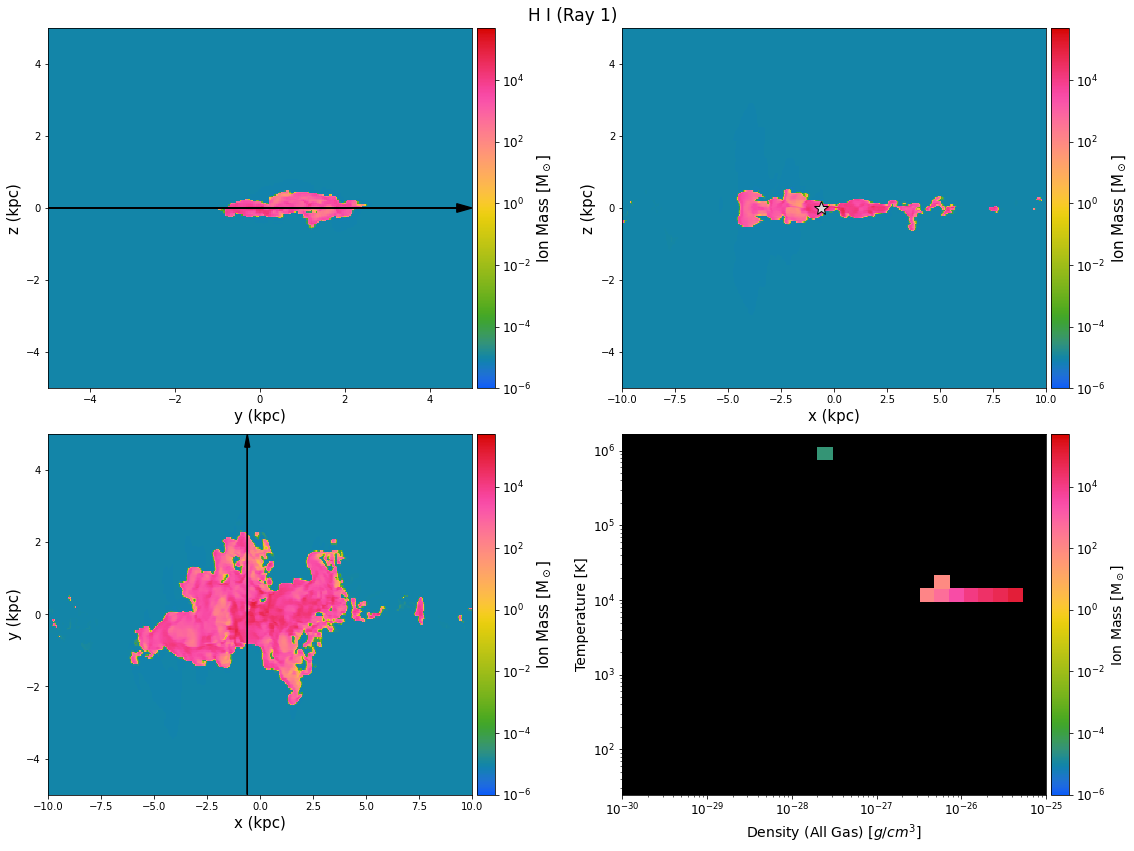

In [12]:
plot(xx=den,yy=temp,zz=HI_ray1,x=240,y=128,z=128,
     rx=-0.6,ry=-5,rz=0,dx_=0,dy_=10,dz_=0, title='H I (Ray 1)', 
     vmin_=10**-6, vmax_=5*10**5,y_arr=False, ion_mass=HI_mass1, color_='black')

In [13]:
SiII_mass = np.array(ds.all_data()[('gas', 'Si_p1_mass')])/M
SiII_ray1 = np.array(ray1.all_data()['Si_p1_mass'])/M
SiII_ray2 = np.array(ray2.all_data()['Si_p1_mass'])/M
SiII_ray3 = np.array(ray3.all_data()['Si_p1_mass'])/M

In [44]:
SiII_mass_r = SiII_mass[np.where(SiII_mass>10**-3)]
SiII_ray1_r = SiII_ray1[np.where(SiII_ray1>10**-3)]

In [52]:
np.shape(SiII_mass)

(33554432,)

In [57]:
(197844/2)**(1/3)

46.24849763807461

In [22]:
print(np.min(SiII_mass[np.nonzero(SiII_mass)]), np.max(SiII_mass))
print(np.min(SiII_ray1[np.nonzero(SiII_ray1)]), np.max(SiII_ray1))

3.1545275286809183e-11 59.26941075077802
0.3315121087432786 14.823951669215761


In [45]:
plot(xx=den,yy=temp,zz=SiII_ray1_r,x=240,y=128,z=128,
     rx=-0.6,ry=-5,rz=0,dx_=0,dy_=10,dz_=0, title='Si II (Ray 1)', 
     vmin_=10**-11, vmax_=5*10**2,y_arr=False, ion_mass=SiII_mass_r)

ValueError: cannot reshape array of size 197844 into shape (512,256,256)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


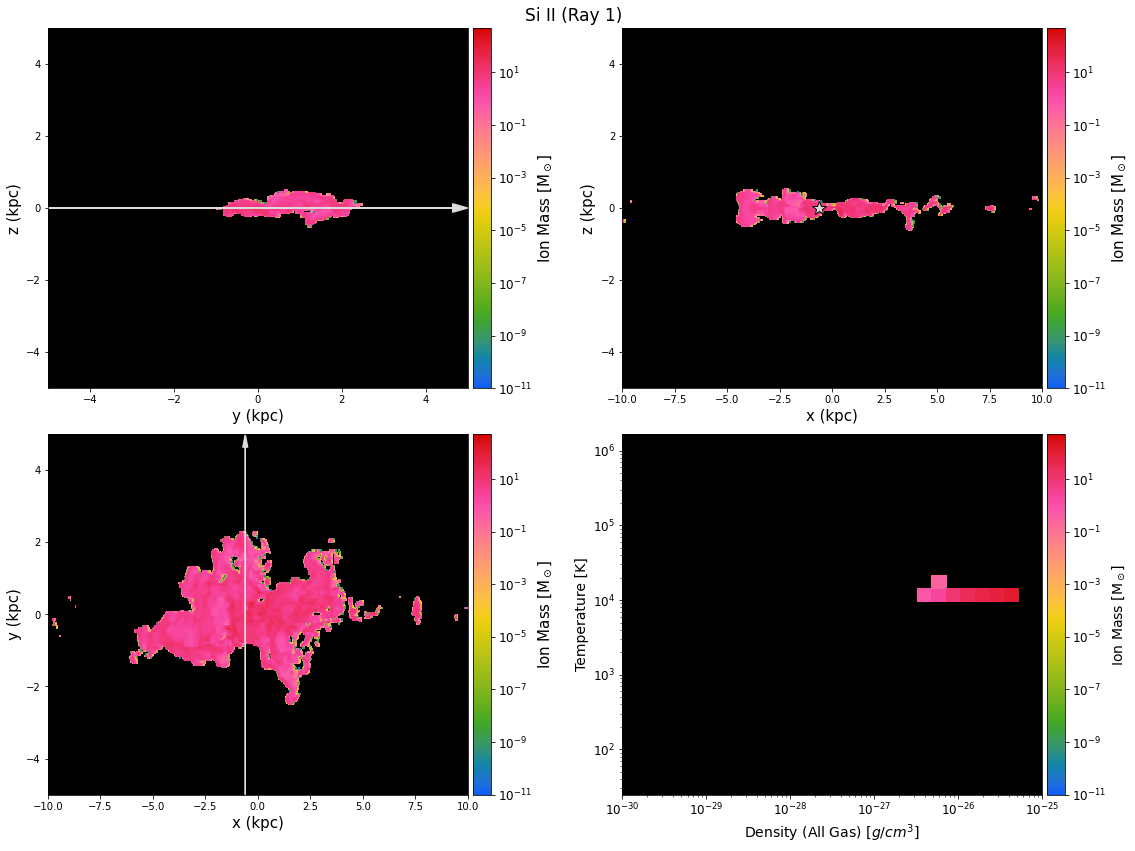

In [25]:
plot(xx=den,yy=temp,zz=SiII_ray1,x=240,y=128,z=128,
     rx=-0.6,ry=-5,rz=0,dx_=0,dy_=10,dz_=0, title='Si II (Ray 1)', 
     vmin_=10**-11, vmax_=5*10**2,y_arr=False, ion_mass=SiII_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


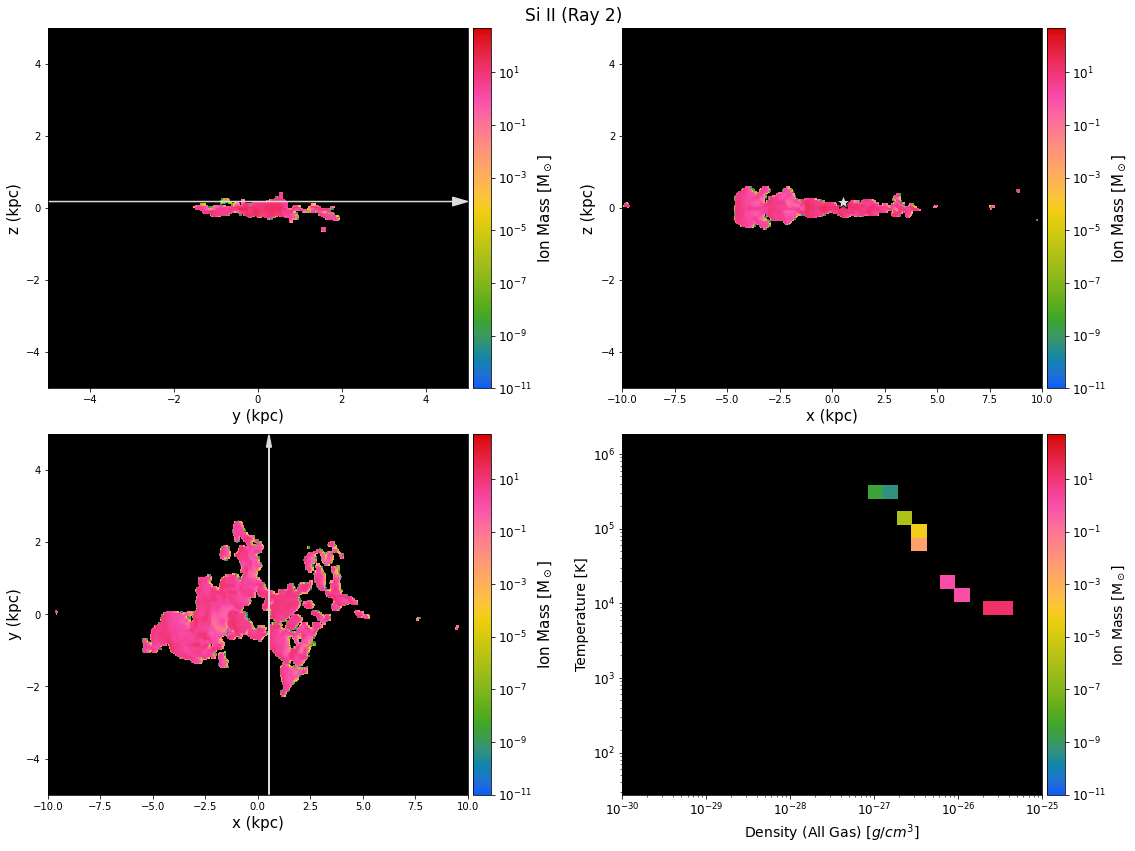

In [26]:
plot(xx=den2,yy=temp2,zz=SiII_ray2,x=269,y=123,z=132,
     rx=0.528,ry=-5,rz=0.18,dx_=0,dy_=10,dz_=0, title='Si II (Ray 2)', 
     vmin_=10**-11, vmax_=5*10**2,y_arr=False, ion_mass=SiII_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


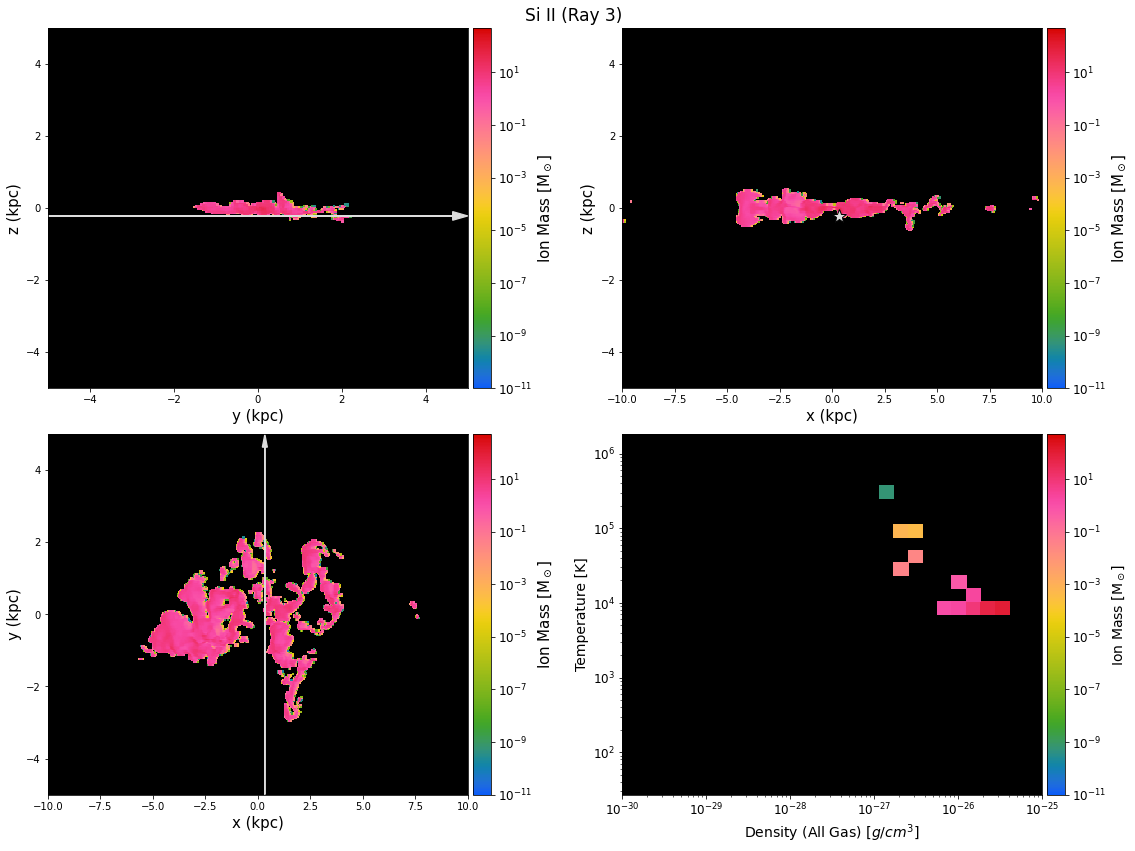

In [27]:
plot(xx=den3,yy=temp3,zz=SiII_ray3,x=264,y=128,z=122,
     rx=0.333,ry=-5,rz=-0.22,dx_=0,dy_=10,dz_=0, title='Si II (Ray 3)', ion_mass=SiII_mass,
    vmin_=10**-11, vmax_=5*10**2)

In [28]:
SiIII_mass = np.array(ds.all_data()[('gas', 'Si_p2_mass')])/M
SiIII_ray1 = np.array(ray1.all_data()['Si_p2_mass'])/M
SiIII_ray2 = np.array(ray2.all_data()['Si_p2_mass'])/M
SiIII_ray3 = np.array(ray3.all_data()['Si_p2_mass'])/M

<ipython-input-38-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-38-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


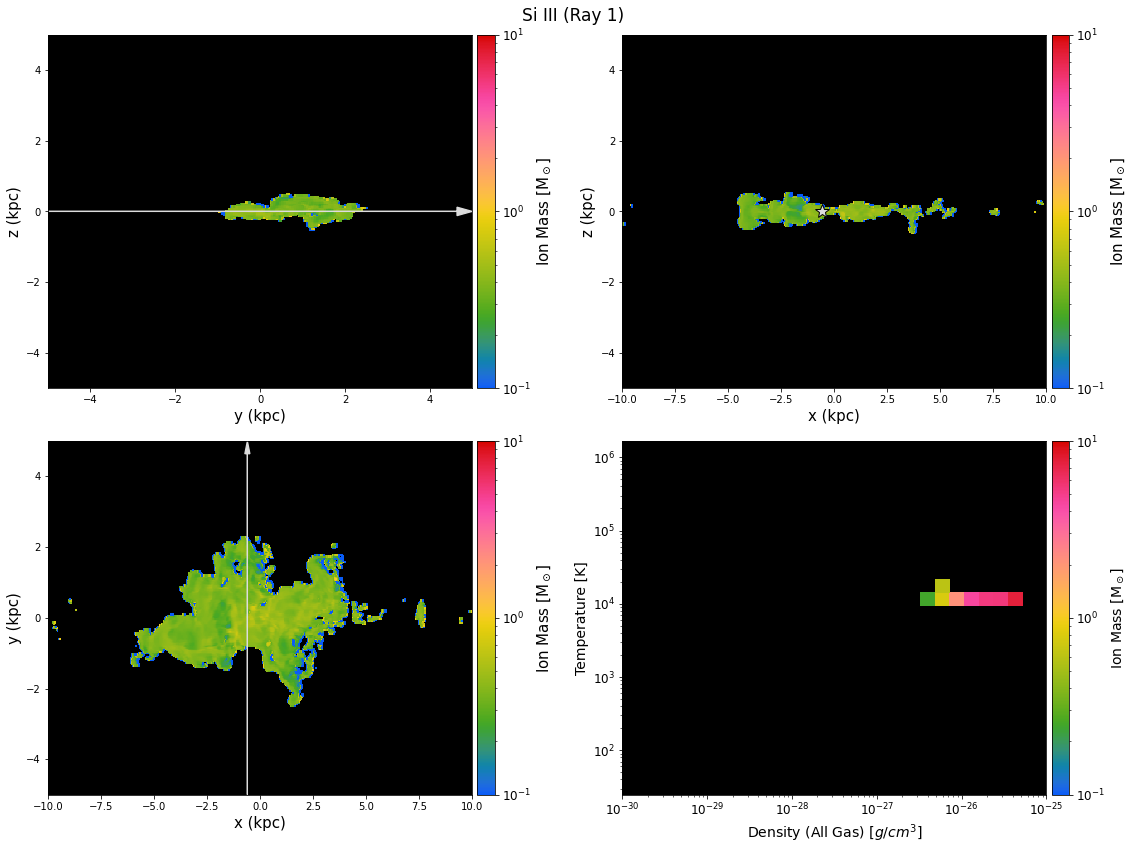

In [40]:
plot(xx=den,yy=temp,zz=SiIII_ray1,x=240,y=128,z=128,
     rx=-0.6,ry=-5,rz=0,dx_=0,dy_=10,dz_=0, title='Si III (Ray 1)', 
     vmin_=10**-1, vmax_=10,y_arr=False, ion_mass=SiIII_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


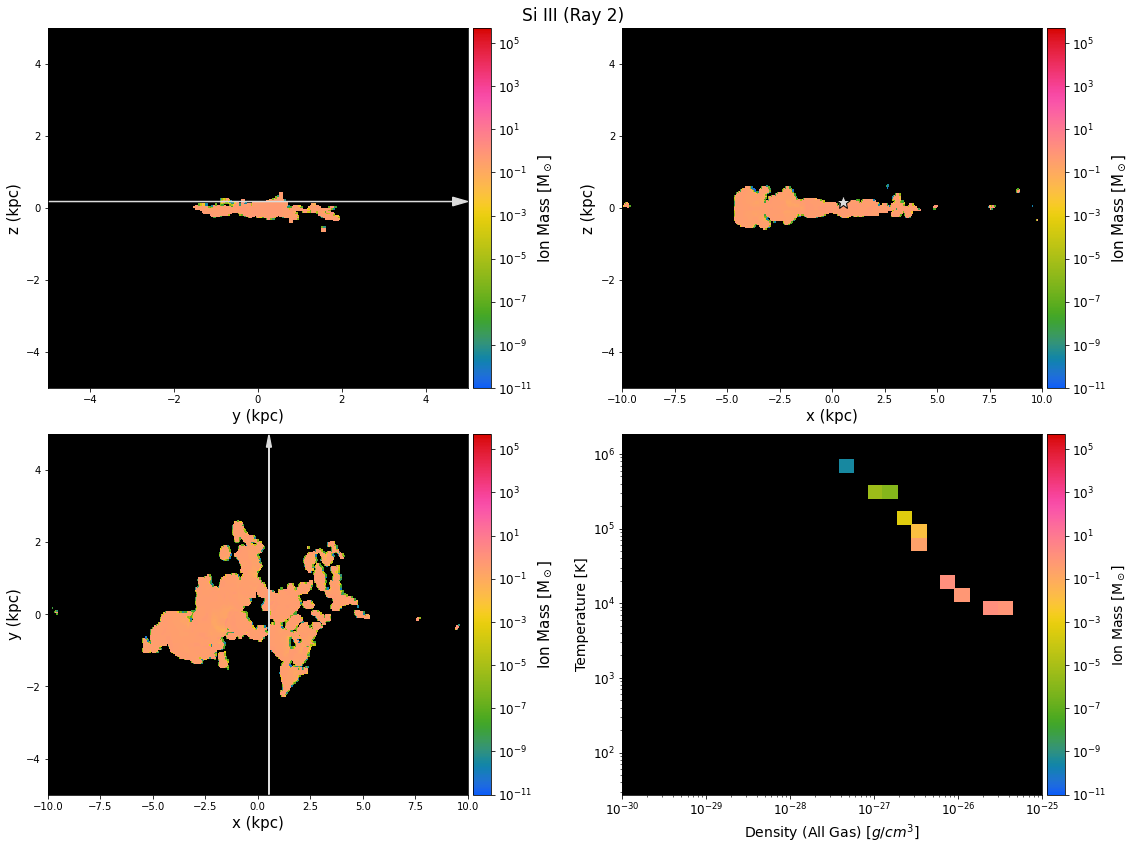

In [22]:
plot(xx=den2,yy=temp2,zz=SiIII_ray2,x=269,y=123,z=132,
     rx=0.528,ry=-5,rz=0.18,dx_=0,dy_=10,dz_=0, title='Si III (Ray 2)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=SiIII_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


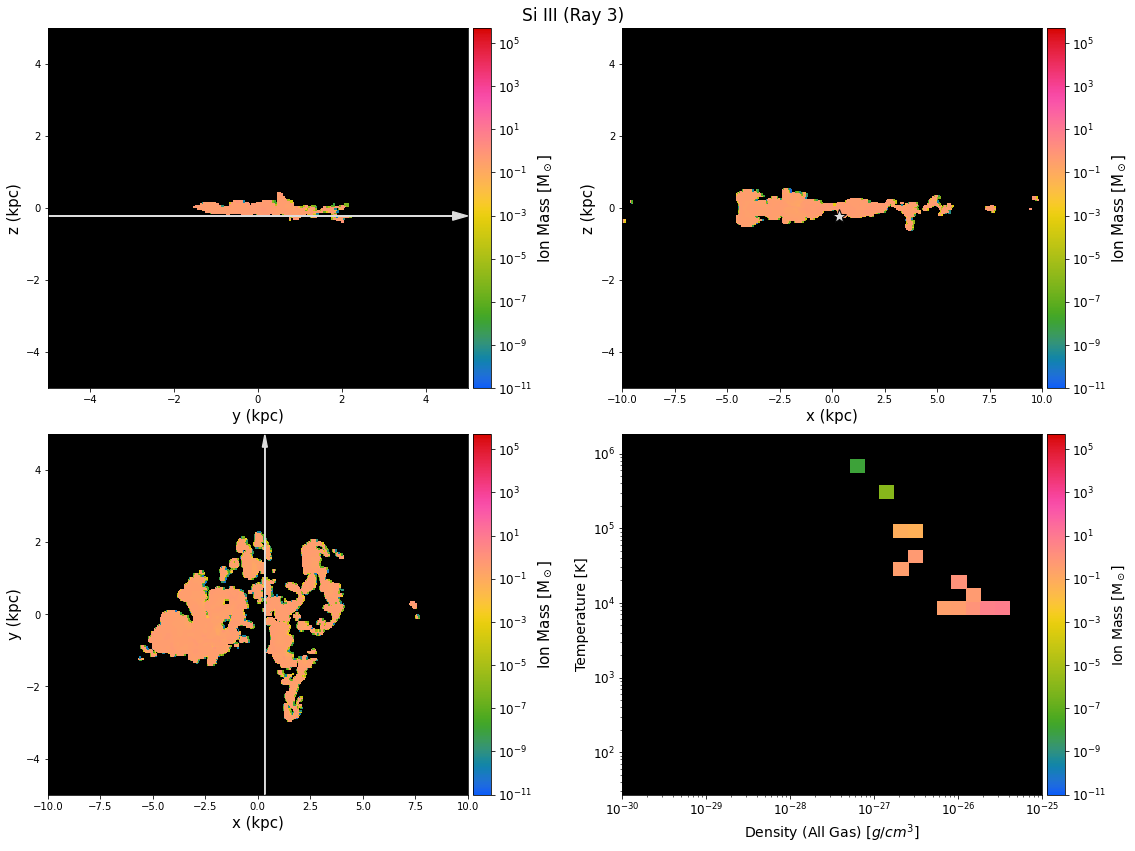

In [23]:
plot(xx=den3,yy=temp3,zz=SiIII_ray3,x=264,y=128,z=122,
     rx=0.333,ry=-5,rz=-0.22,dx_=0,dy_=10,dz_=0, title='Si III (Ray 3)', ion_mass=SiIII_mass,
    vmin_=10**-11, vmax_=5*10**5)

In [24]:
CII_mass = np.array(ds.all_data()[('gas', 'C_p1_mass')])/M
CII_ray1 = np.array(ray1.all_data()['C_p1_mass'])/M
CII_ray2 = np.array(ray2.all_data()['C_p1_mass'])/M
CII_ray3 = np.array(ray3.all_data()['C_p1_mass'])/M

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


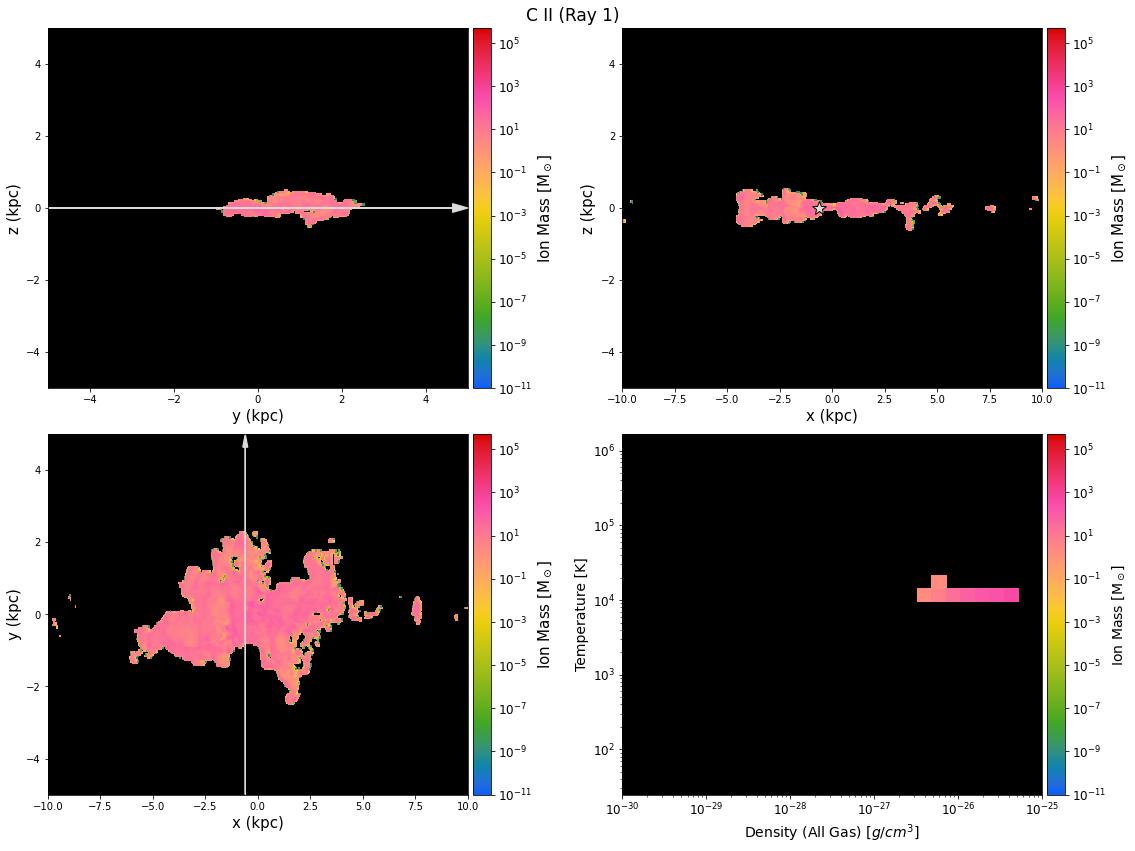

In [25]:
plot(xx=den,yy=temp,zz=CII_ray1,x=240,y=128,z=128,
     rx=-0.6,ry=-5,rz=0,dx_=0,dy_=10,dz_=0, title='C II (Ray 1)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=CII_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


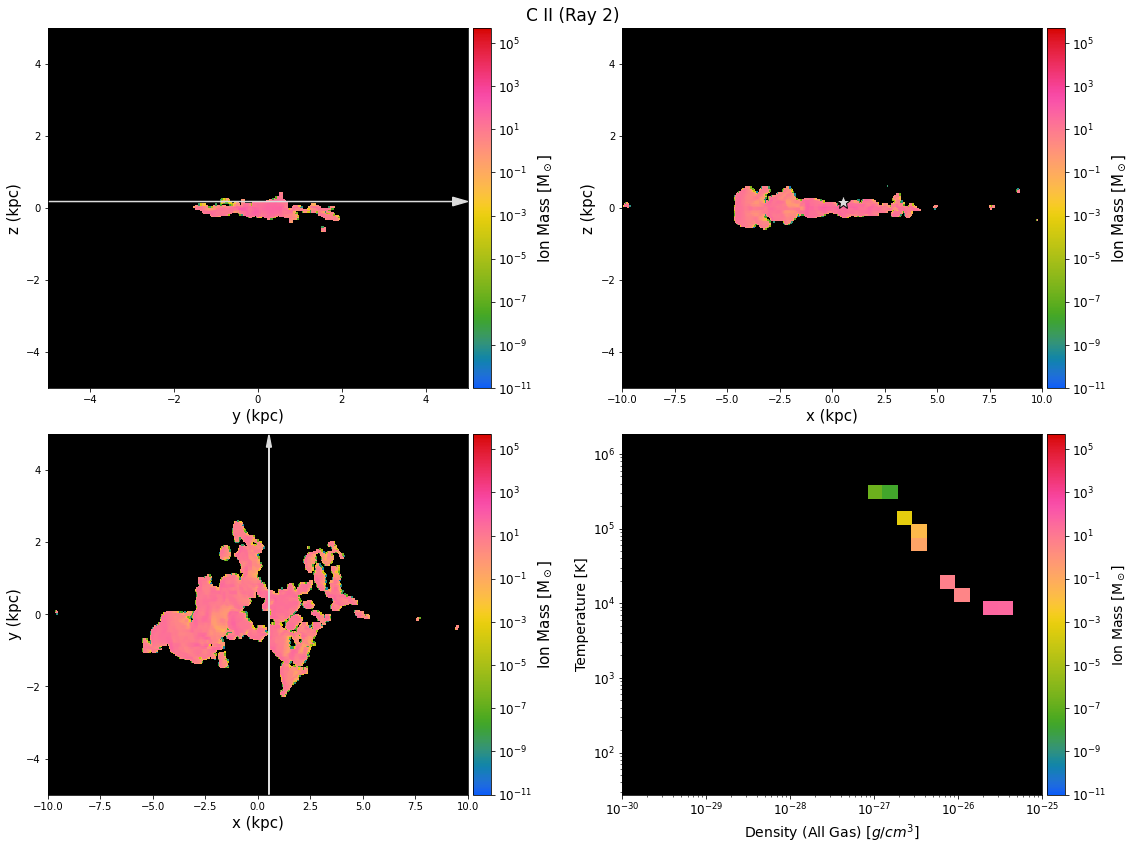

In [26]:
plot(xx=den2,yy=temp2,zz=CII_ray2,x=269,y=123,z=132,
     rx=0.528,ry=-5,rz=0.18,dx_=0,dy_=10,dz_=0, title='C II (Ray 2)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=CII_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


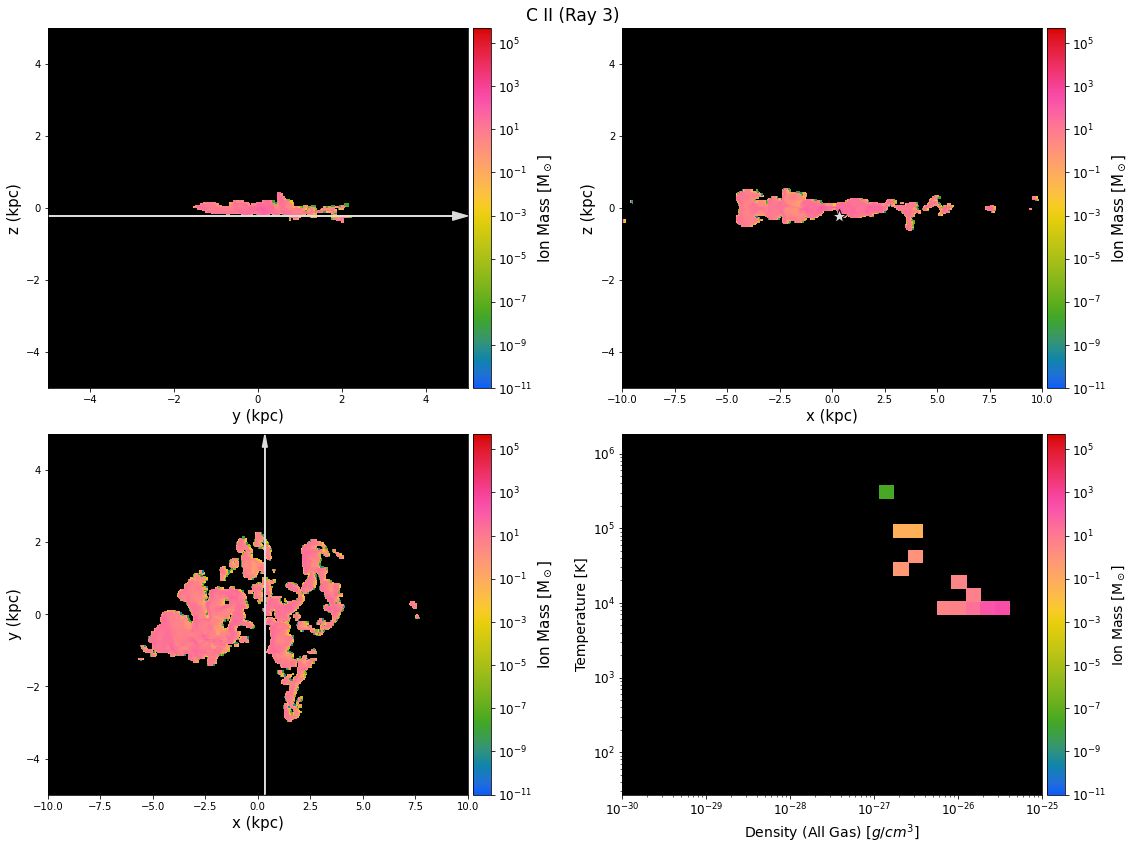

In [27]:
plot(xx=den3,yy=temp3,zz=CII_ray3,x=264,y=128,z=122,
     rx=0.333,ry=-5,rz=-0.22,dx_=0,dy_=10,dz_=0, title='C II (Ray 3)', ion_mass=CII_mass,
    vmin_=10**-11, vmax_=5*10**5)

In [28]:
CIII_mass = np.array(ds.all_data()[('gas', 'C_p2_mass')])/M
CIII_ray1 = np.array(ray1.all_data()['C_p2_mass'])/M
CIII_ray2 = np.array(ray2.all_data()['C_p2_mass'])/M
CIII_ray3 = np.array(ray3.all_data()['C_p2_mass'])/M

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


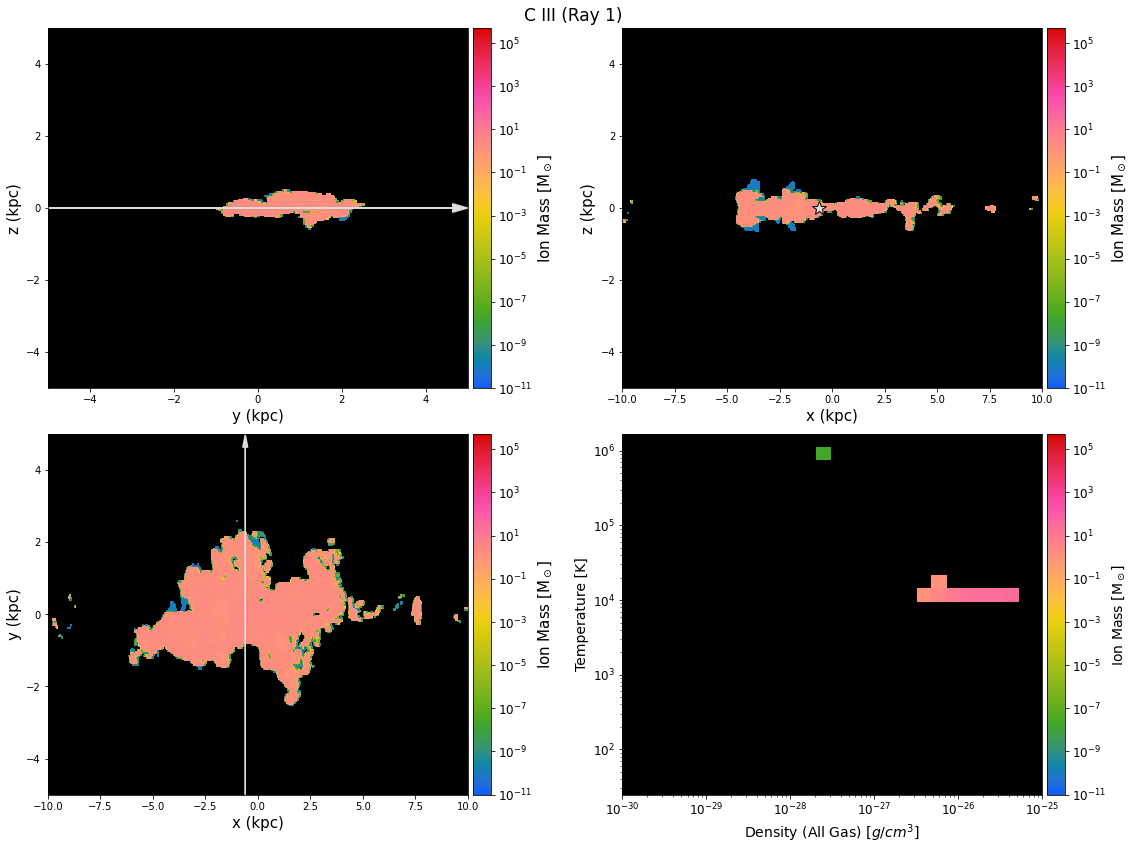

In [29]:
plot(xx=den,yy=temp,zz=CIII_ray1,x=240,y=128,z=128,
     rx=-0.6,ry=-5,rz=0,dx_=0,dy_=10,dz_=0, title='C III (Ray 1)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=CIII_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


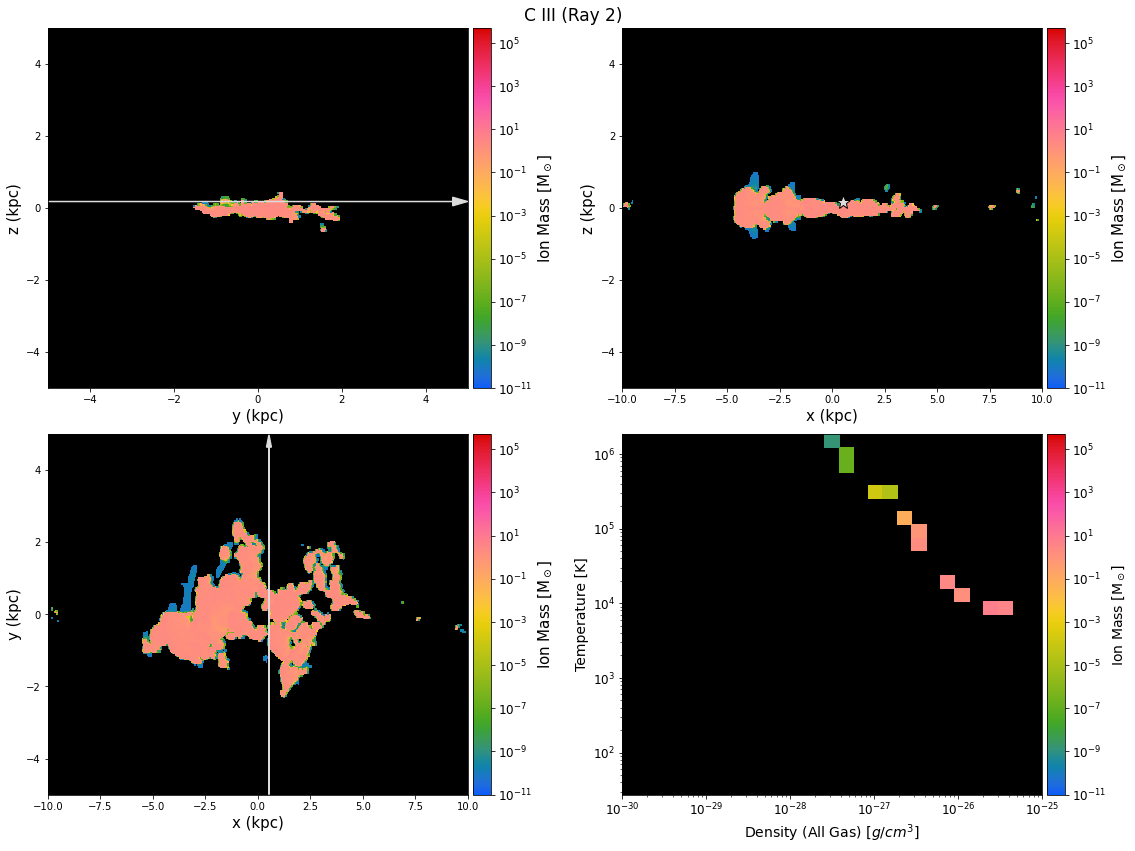

In [30]:
plot(xx=den2,yy=temp2,zz=CIII_ray2,x=269,y=123,z=132,
     rx=0.528,ry=-5,rz=0.18,dx_=0,dy_=10,dz_=0, title='C III (Ray 2)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=CIII_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


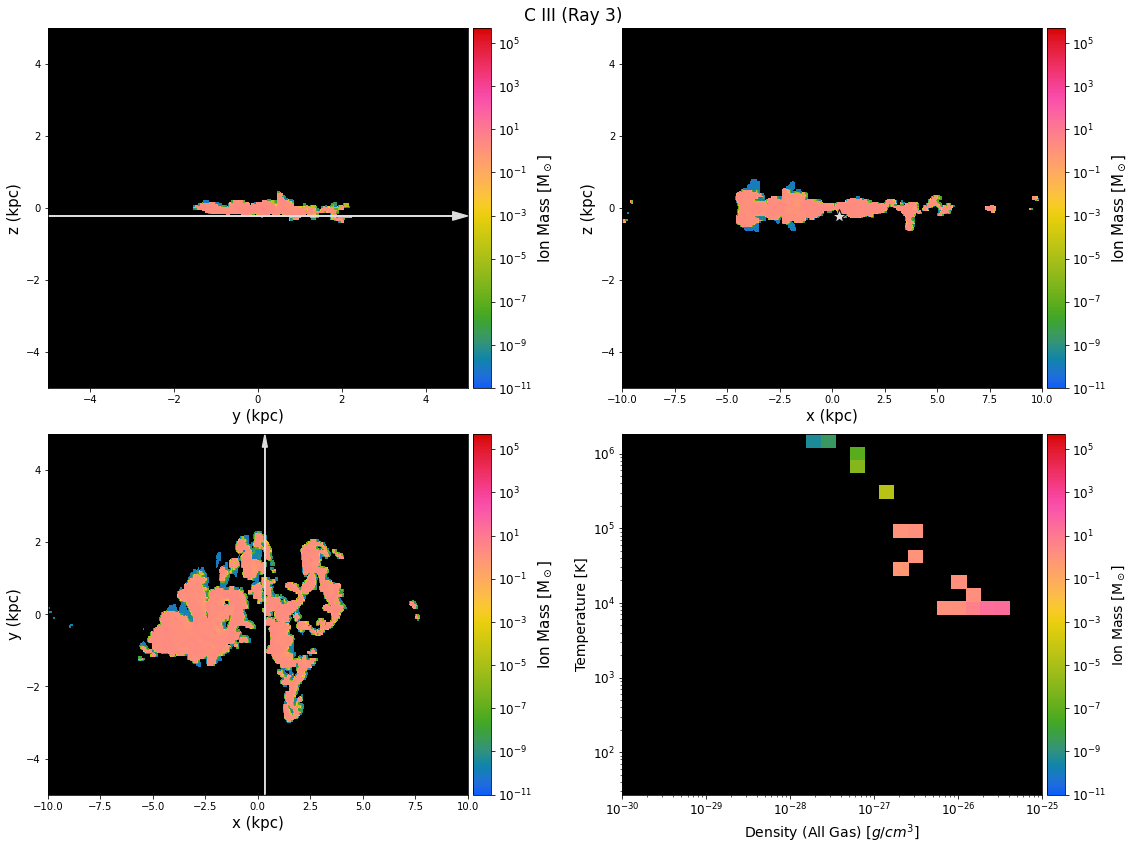

In [31]:
plot(xx=den3,yy=temp3,zz=CIII_ray3,x=264,y=128,z=122,
     rx=0.333,ry=-5,rz=-0.22,dx_=0,dy_=10,dz_=0, title='C III (Ray 3)', ion_mass=CIII_mass,
    vmin_=10**-11, vmax_=5*10**5)

In [32]:
OI_mass = np.array(ds.all_data()[('gas', 'O_p0_mass')])/M
OI_ray1 = np.array(ray1.all_data()['O_p0_mass'])/M
OI_ray2 = np.array(ray2.all_data()['O_p0_mass'])/M
OI_ray3 = np.array(ray3.all_data()['O_p0_mass'])/M

OII_mass = np.array(ds.all_data()[('gas', 'O_p1_mass')])/M
OII_ray1 = np.array(ray1.all_data()['O_p1_mass'])/M
OII_ray2 = np.array(ray2.all_data()['O_p1_mass'])/M
OII_ray3 = np.array(ray3.all_data()['O_p1_mass'])/M

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


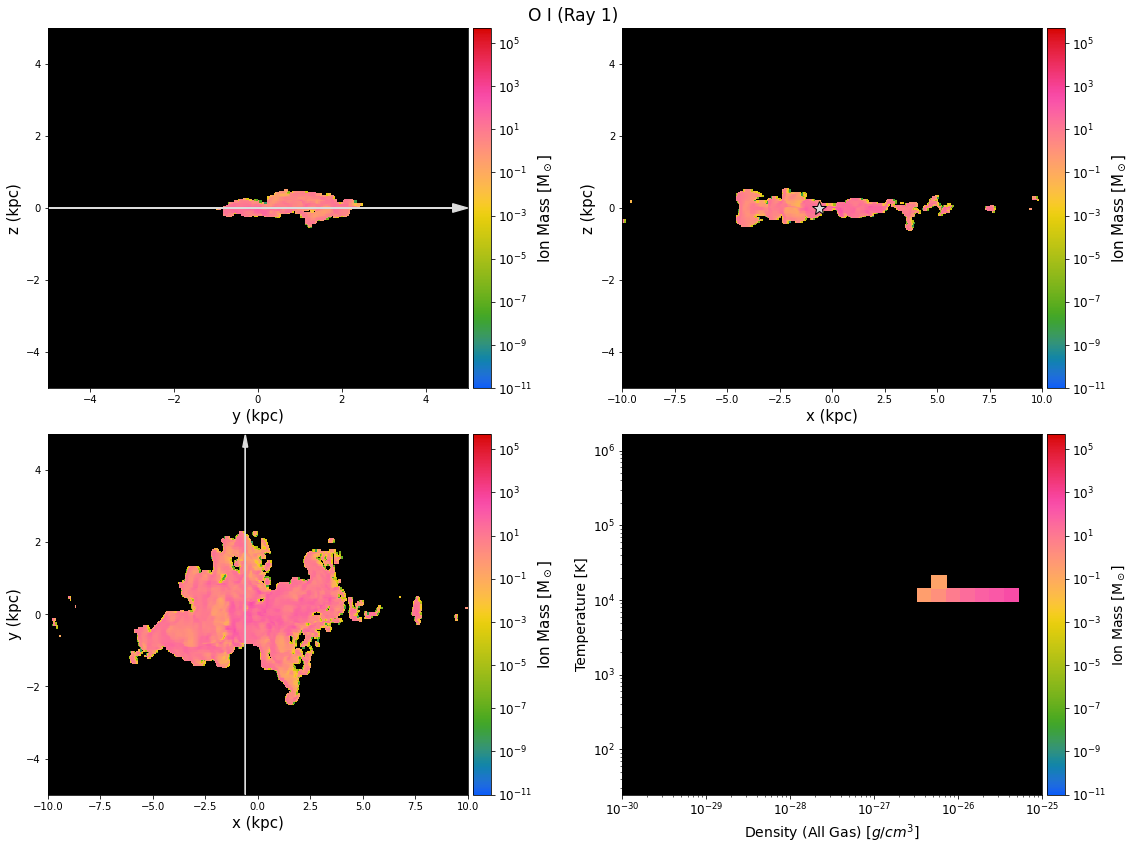

In [33]:
plot(xx=den,yy=temp,zz=OI_ray1,x=240,y=128,z=128,
     rx=-0.6,ry=-5,rz=0,dx_=0,dy_=10,dz_=0, title='O I (Ray 1)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=OI_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


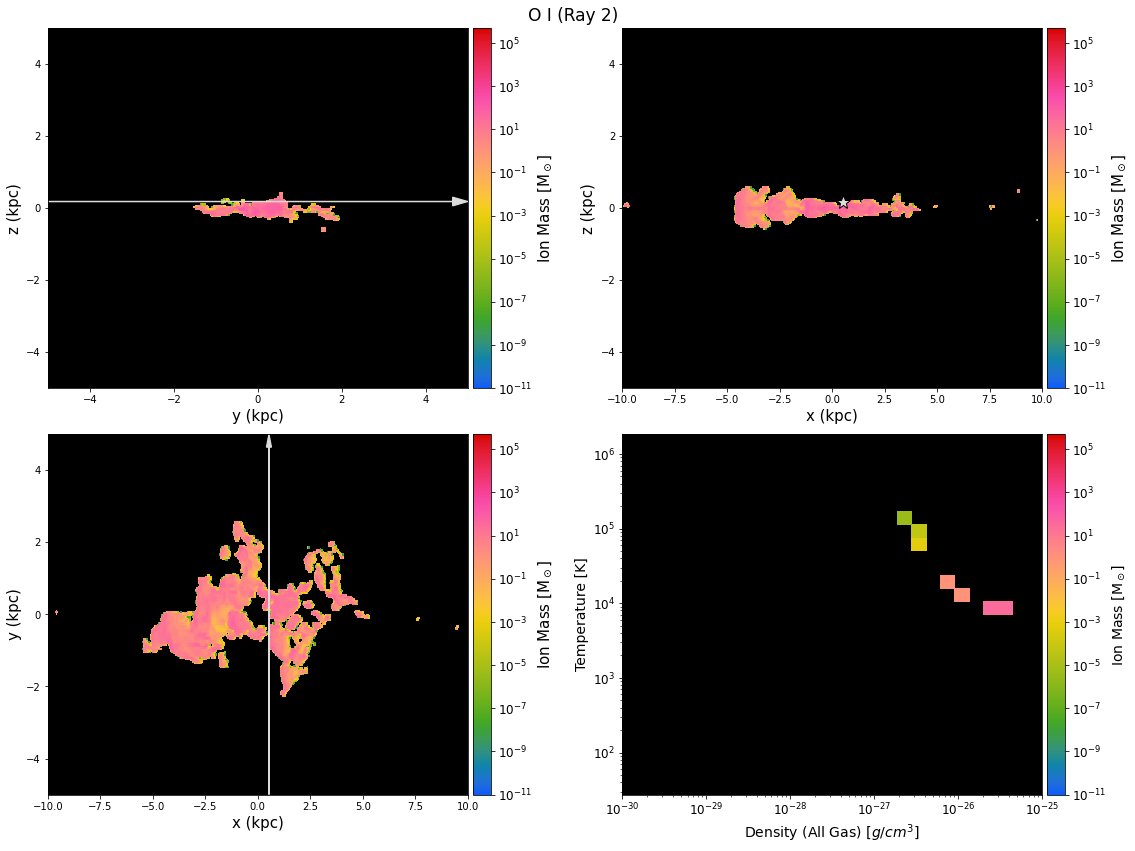

In [34]:
plot(xx=den2,yy=temp2,zz=OI_ray2,x=269,y=123,z=132,
     rx=0.528,ry=-5,rz=0.18,dx_=0,dy_=10,dz_=0, title='O I (Ray 2)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=OI_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


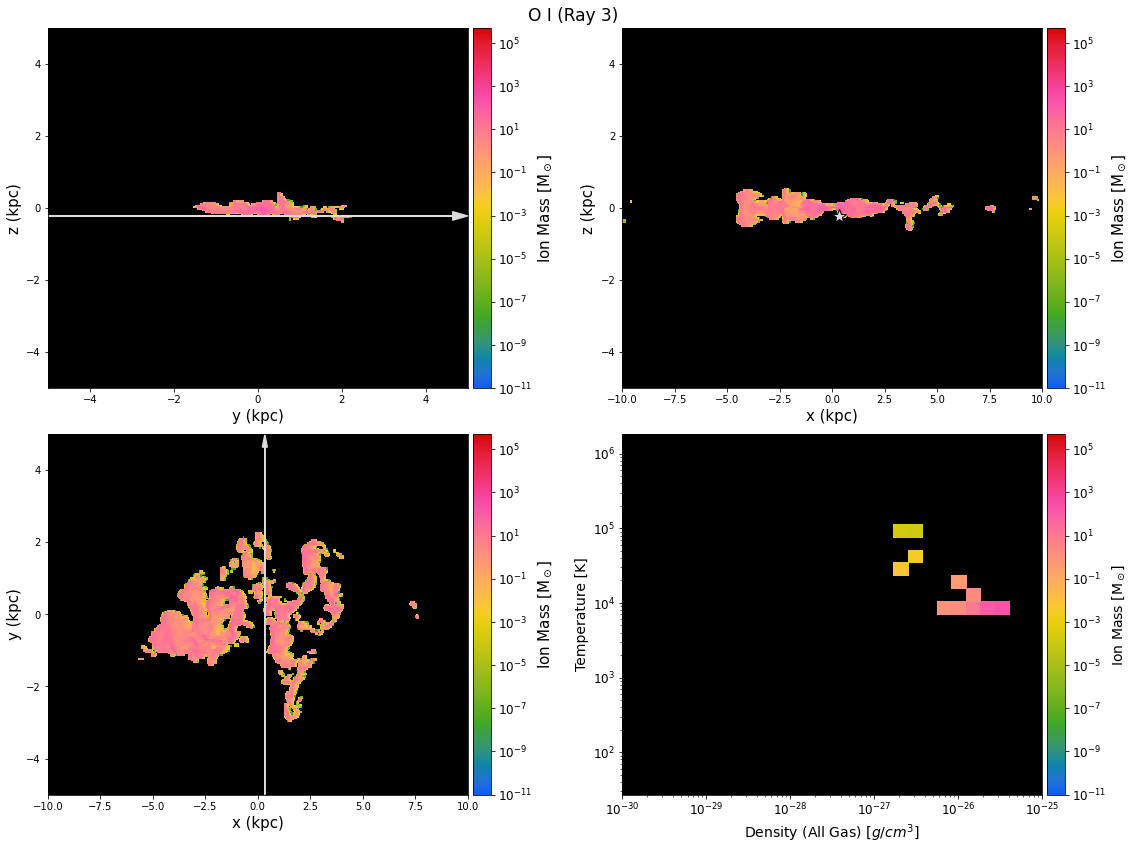

In [35]:
plot(xx=den3,yy=temp3,zz=OI_ray3,x=264,y=128,z=122,
     rx=0.333,ry=-5,rz=-0.22,dx_=0,dy_=10,dz_=0, title='O I (Ray 3)', ion_mass=OI_mass,
    vmin_=10**-11, vmax_=5*10**5)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


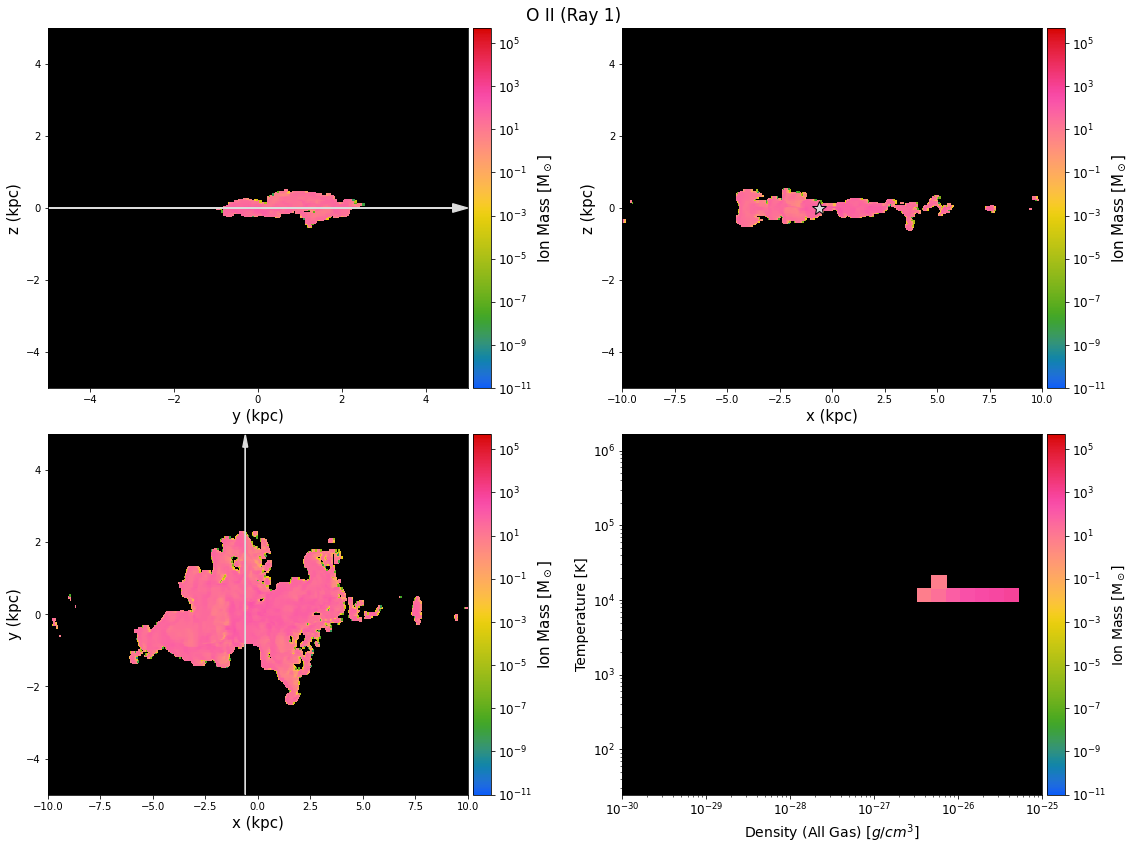

In [36]:
plot(xx=den,yy=temp,zz=OII_ray1,x=240,y=128,z=128,
     rx=-0.6,ry=-5,rz=0,dx_=0,dy_=10,dz_=0, title='O II (Ray 1)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=OII_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


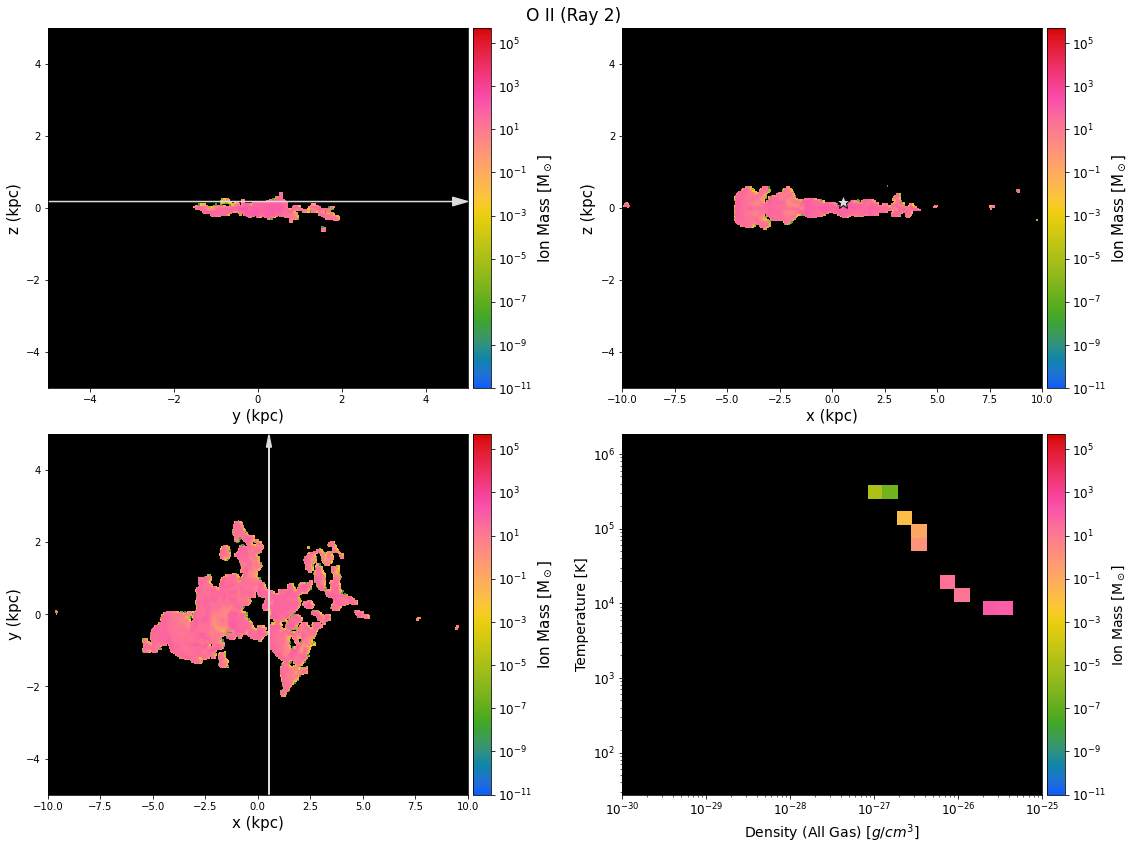

In [37]:
plot(xx=den2,yy=temp2,zz=OII_ray2,x=269,y=123,z=132,
     rx=0.528,ry=-5,rz=0.18,dx_=0,dy_=10,dz_=0, title='O II (Ray 2)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=OII_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


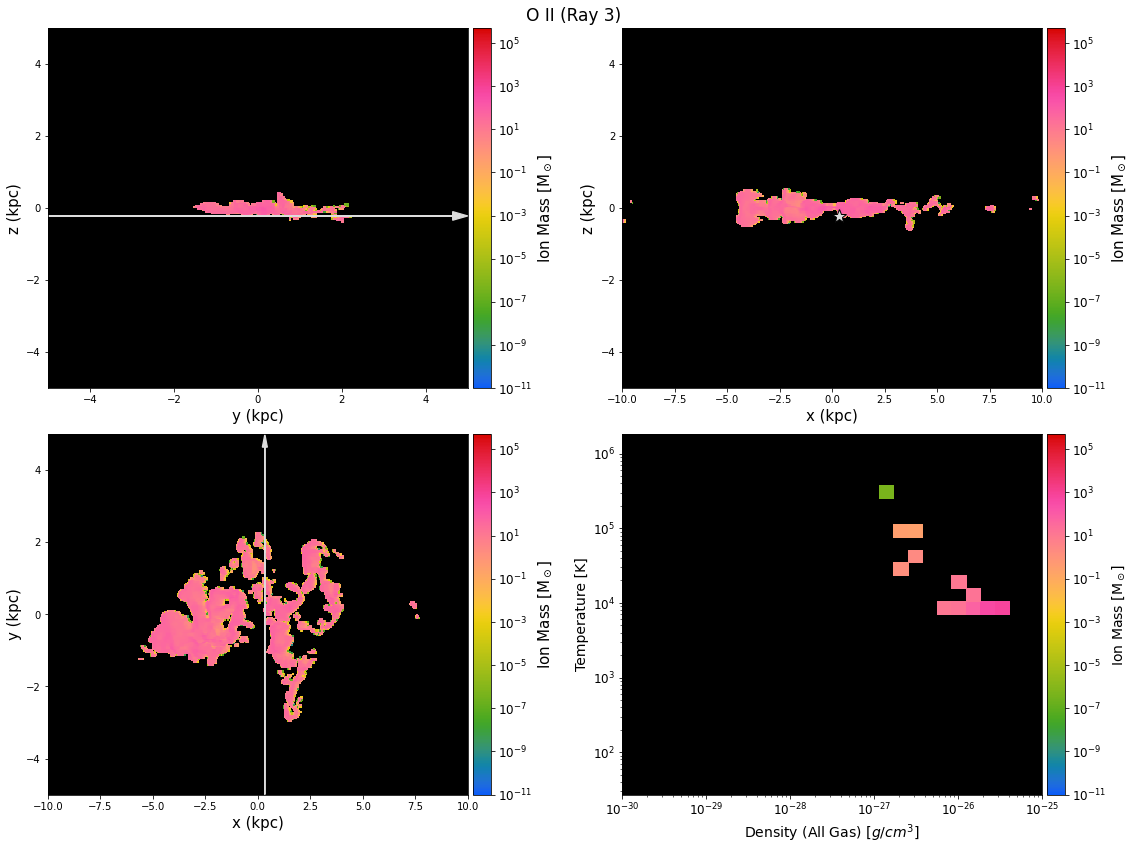

In [38]:
plot(xx=den3,yy=temp3,zz=OII_ray3,x=264,y=128,z=122,
     rx=0.333,ry=-5,rz=-0.22,dx_=0,dy_=10,dz_=0, title='O II (Ray 3)', ion_mass=OII_mass,
    vmin_=10**-11, vmax_=5*10**5)

In [39]:
AlII_mass = np.array(ds.all_data()[('gas', 'Al_p1_mass')])/M
AlII_ray1 = np.array(ray1.all_data()['Al_p1_mass'])/M
AlII_ray2 = np.array(ray2.all_data()['Al_p1_mass'])/M
AlII_ray3 = np.array(ray3.all_data()['Al_p1_mass'])/M

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


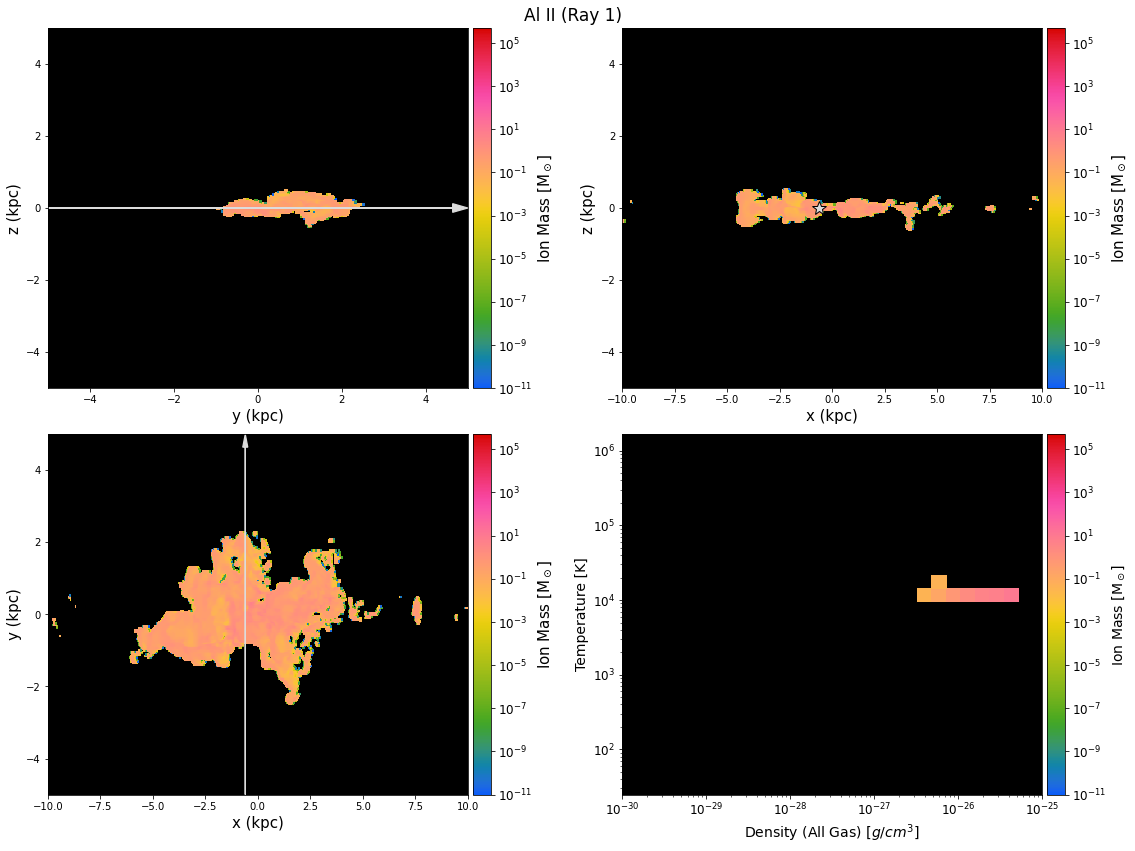

In [40]:
plot(xx=den,yy=temp,zz=AlII_ray1,x=240,y=128,z=128,
     rx=-0.6,ry=-5,rz=0,dx_=0,dy_=10,dz_=0, title='Al II (Ray 1)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=AlII_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


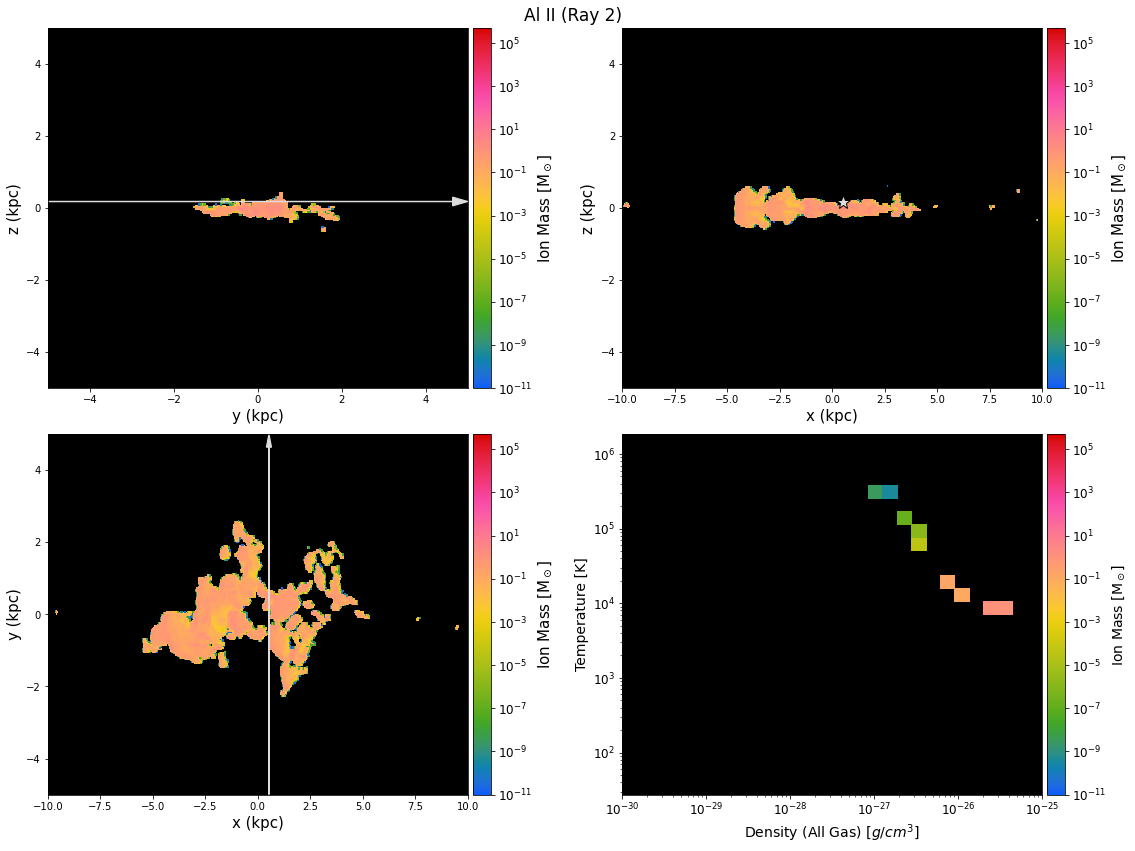

In [41]:
plot(xx=den2,yy=temp2,zz=AlII_ray2,x=269,y=123,z=132,
     rx=0.528,ry=-5,rz=0.18,dx_=0,dy_=10,dz_=0, title='Al II (Ray 2)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=AlII_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


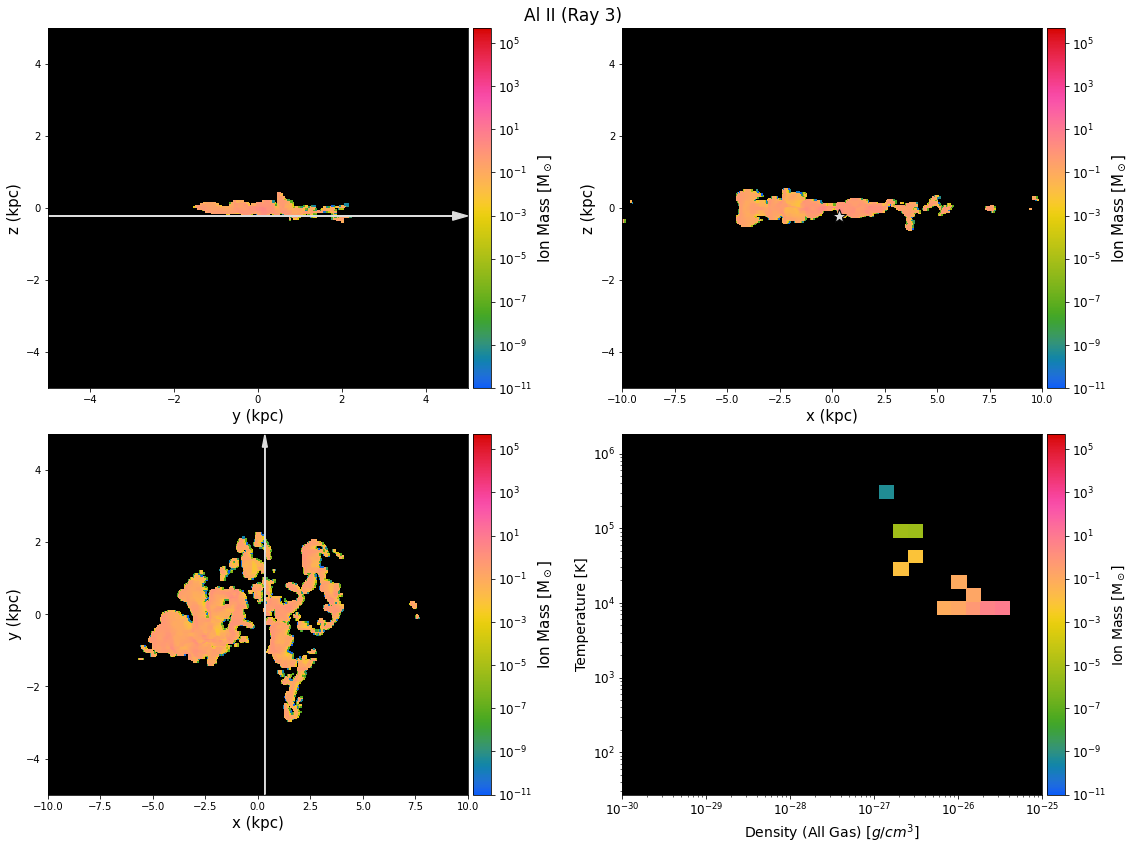

In [42]:
plot(xx=den3,yy=temp3,zz=AlII_ray3,x=264,y=128,z=122,
     rx=0.333,ry=-5,rz=-0.22,dx_=0,dy_=10,dz_=0, title='Al II (Ray 3)', ion_mass=AlII_mass,
    vmin_=10**-11, vmax_=5*10**5)

In [43]:
FeII_mass = np.array(ds.all_data()[('gas', 'Fe_p1_mass')])/M
FeII_ray1 = np.array(ray1.all_data()['Fe_p1_mass'])/M
FeII_ray2 = np.array(ray2.all_data()['Fe_p1_mass'])/M
FeII_ray3 = np.array(ray3.all_data()['Fe_p1_mass'])/M

FeIII_mass = np.array(ds.all_data()[('gas', 'Fe_p2_mass')])/M
FeIII_ray1 = np.array(ray1.all_data()['Fe_p2_mass'])/M
FeIII_ray2 = np.array(ray2.all_data()['Fe_p2_mass'])/M
FeIII_ray3 = np.array(ray3.all_data()['Fe_p2_mass'])/M

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


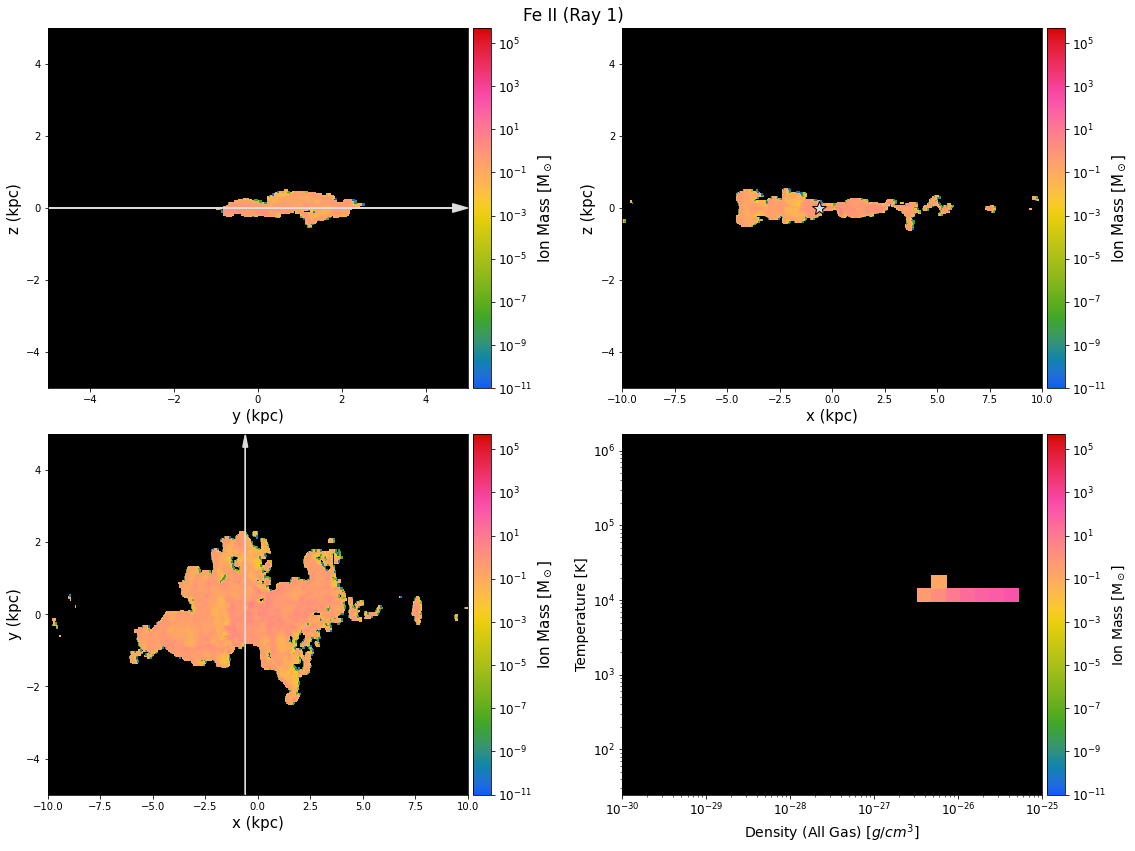

In [44]:
plot(xx=den,yy=temp,zz=FeII_ray1,x=240,y=128,z=128,
     rx=-0.6,ry=-5,rz=0,dx_=0,dy_=10,dz_=0, title='Fe II (Ray 1)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=AlII_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


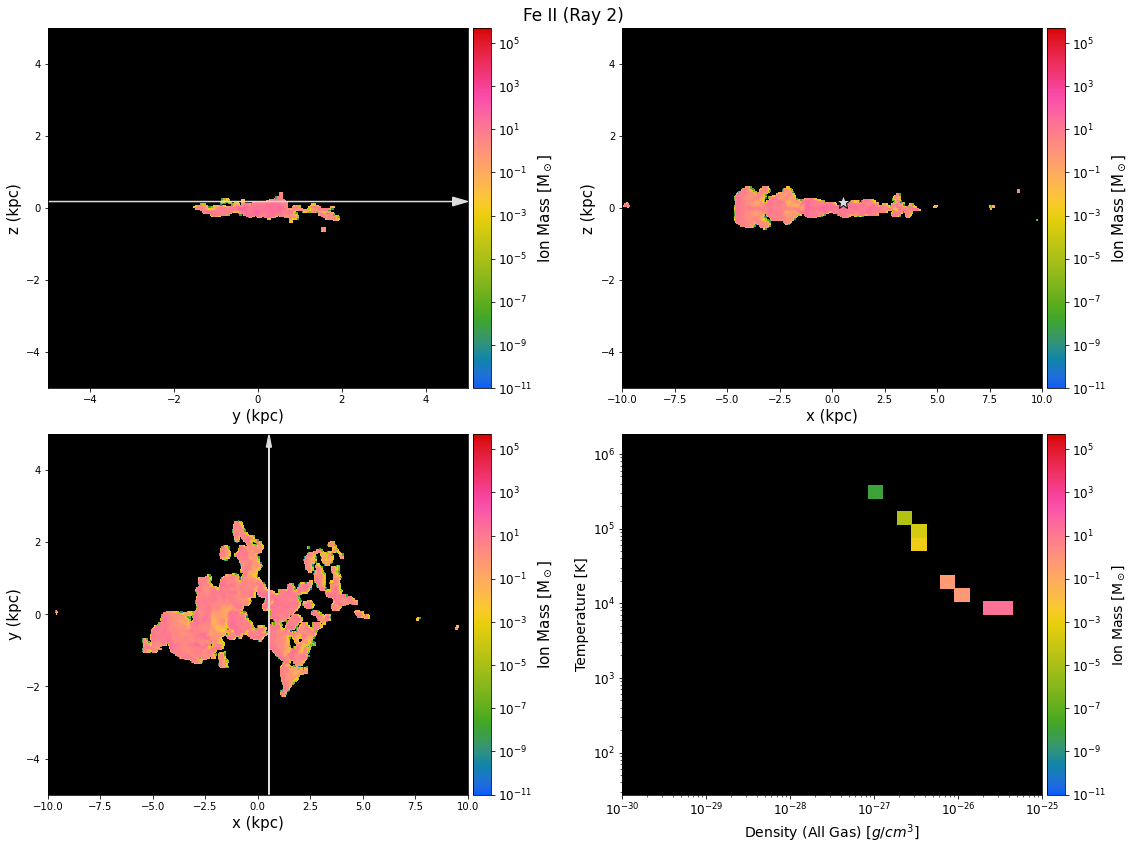

In [45]:
plot(xx=den2,yy=temp2,zz=FeII_ray2,x=269,y=123,z=132,
     rx=0.528,ry=-5,rz=0.18,dx_=0,dy_=10,dz_=0, title='Fe II (Ray 2)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=FeII_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


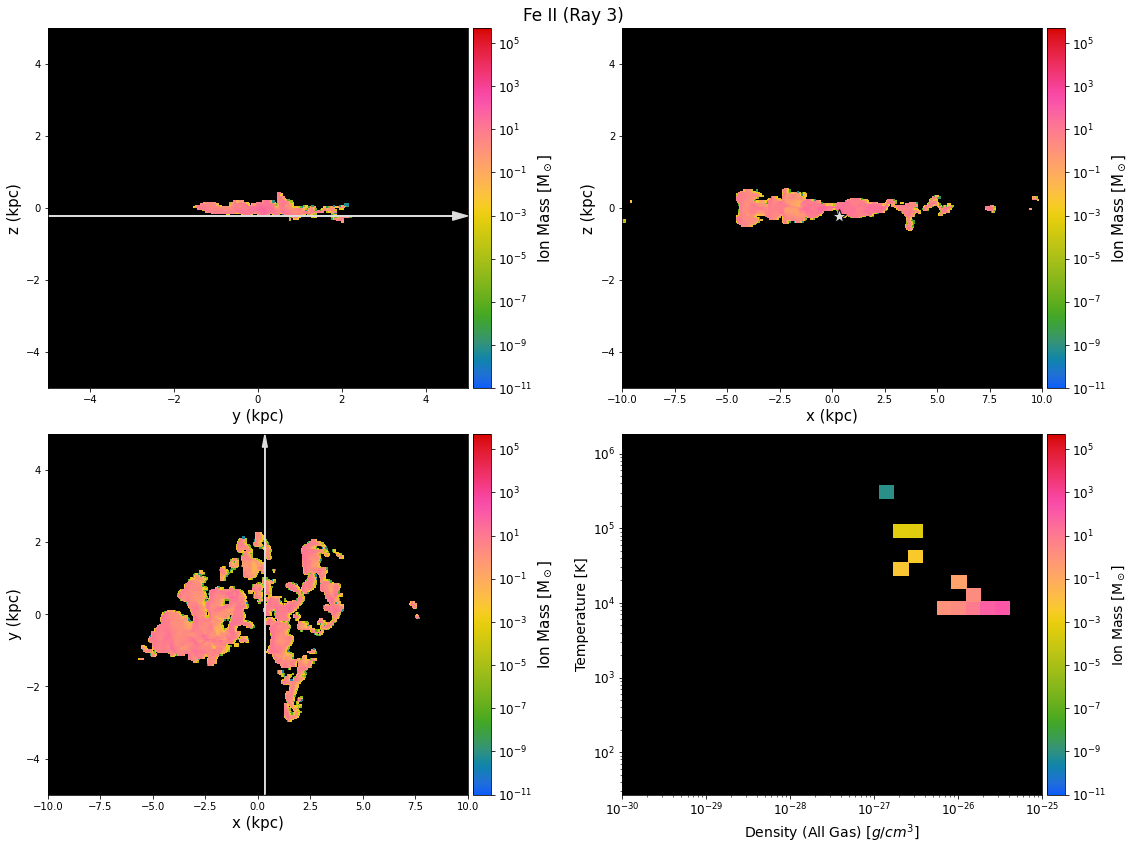

In [46]:
plot(xx=den3,yy=temp3,zz=FeII_ray3,x=264,y=128,z=122,
     rx=0.333,ry=-5,rz=-0.22,dx_=0,dy_=10,dz_=0, title='Fe II (Ray 3)', ion_mass=FeII_mass,
    vmin_=10**-11, vmax_=5*10**5)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


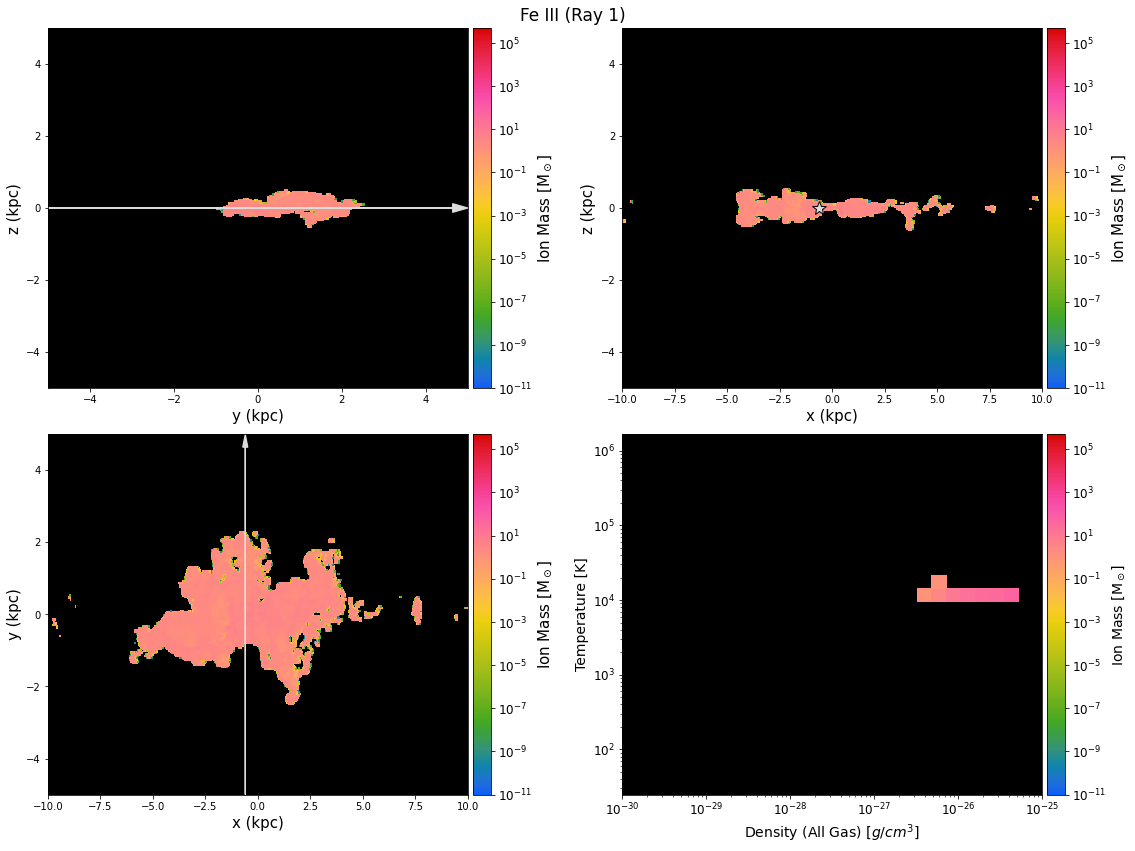

In [47]:
plot(xx=den,yy=temp,zz=FeIII_ray1,x=240,y=128,z=128,
     rx=-0.6,ry=-5,rz=0,dx_=0,dy_=10,dz_=0, title='Fe III (Ray 1)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=FeIII_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


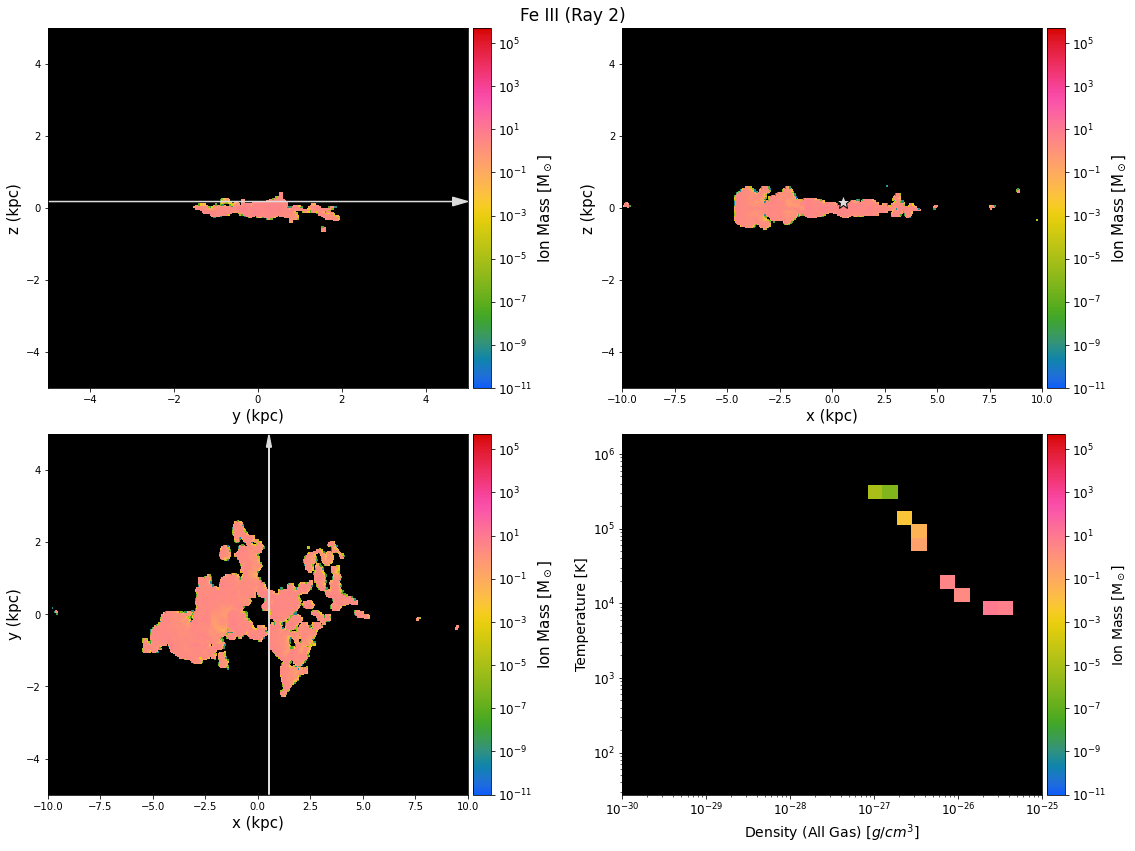

In [48]:
plot(xx=den2,yy=temp2,zz=FeIII_ray2,x=269,y=123,z=132,
     rx=0.528,ry=-5,rz=0.18,dx_=0,dy_=10,dz_=0, title='Fe III (Ray 2)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=FeIII_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


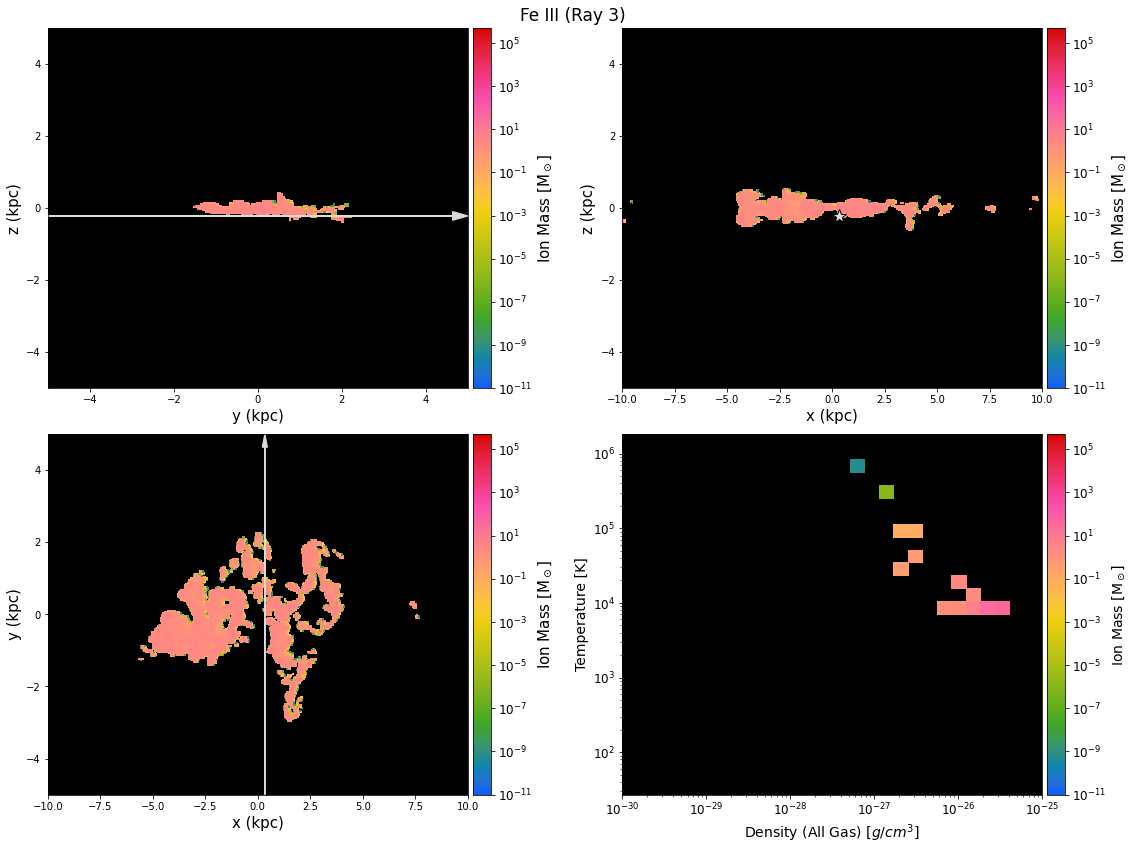

In [49]:
plot(xx=den3,yy=temp3,zz=FeIII_ray3,x=264,y=128,z=122,
     rx=0.333,ry=-5,rz=-0.22,dx_=0,dy_=10,dz_=0, title='Fe III (Ray 3)', ion_mass=FeIII_mass,
    vmin_=10**-11, vmax_=5*10**5)

In [50]:
MgII_mass = np.array(ds.all_data()[('gas', 'Mg_p1_mass')])/M
MgII_ray1 = np.array(ray1.all_data()['Mg_p1_mass'])/M
MgII_ray2 = np.array(ray2.all_data()['Mg_p1_mass'])/M
MgII_ray3 = np.array(ray3.all_data()['Mg_p1_mass'])/M

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


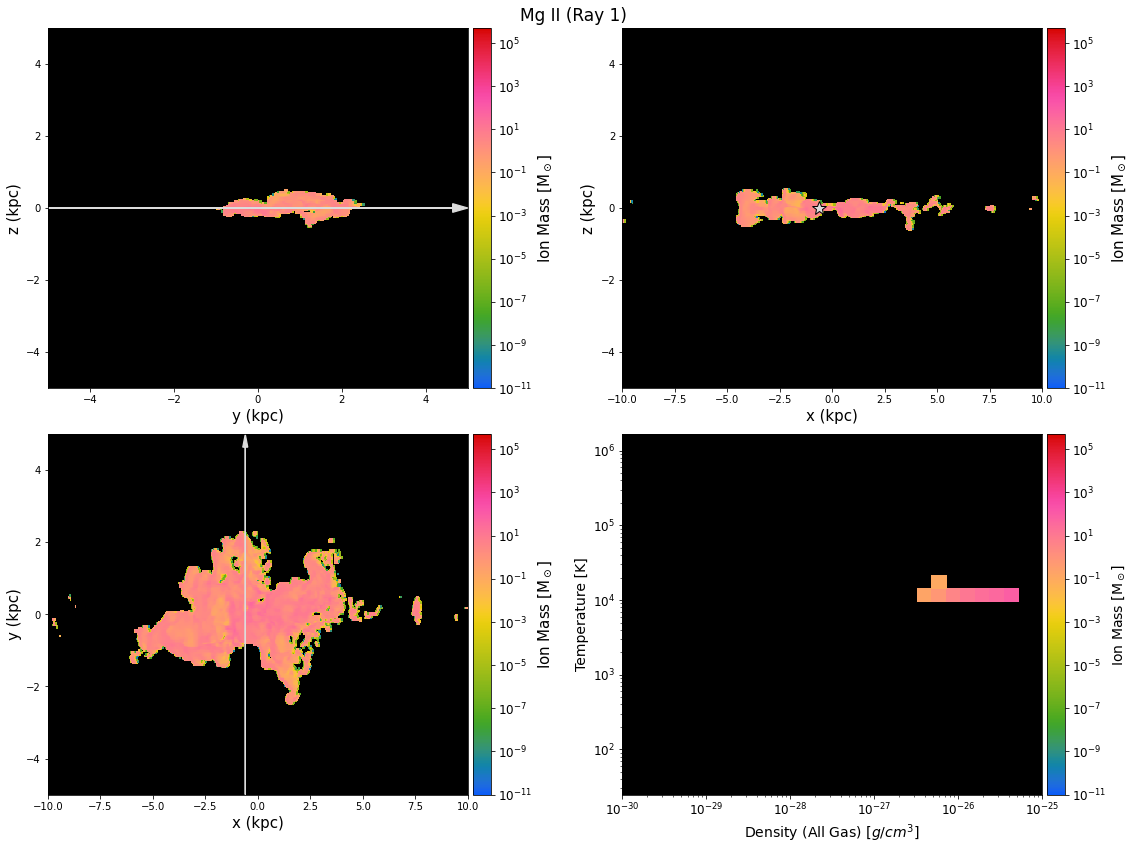

In [51]:
plot(xx=den,yy=temp,zz=MgII_ray1,x=240,y=128,z=128,
     rx=-0.6,ry=-5,rz=0,dx_=0,dy_=10,dz_=0, title='Mg II (Ray 1)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=MgII_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


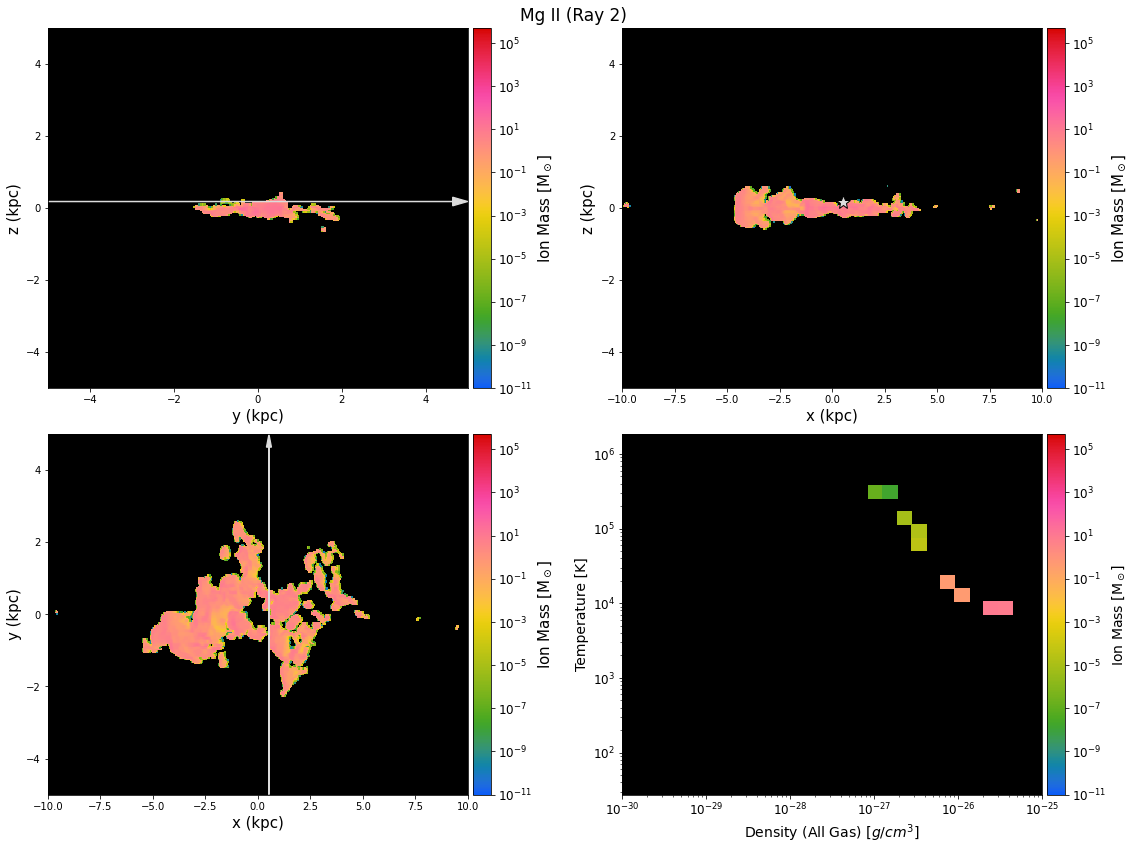

In [52]:
plot(xx=den2,yy=temp2,zz=MgII_ray2,x=269,y=123,z=132,
     rx=0.528,ry=-5,rz=0.18,dx_=0,dy_=10,dz_=0, title='Mg II (Ray 2)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=MgII_mass)

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


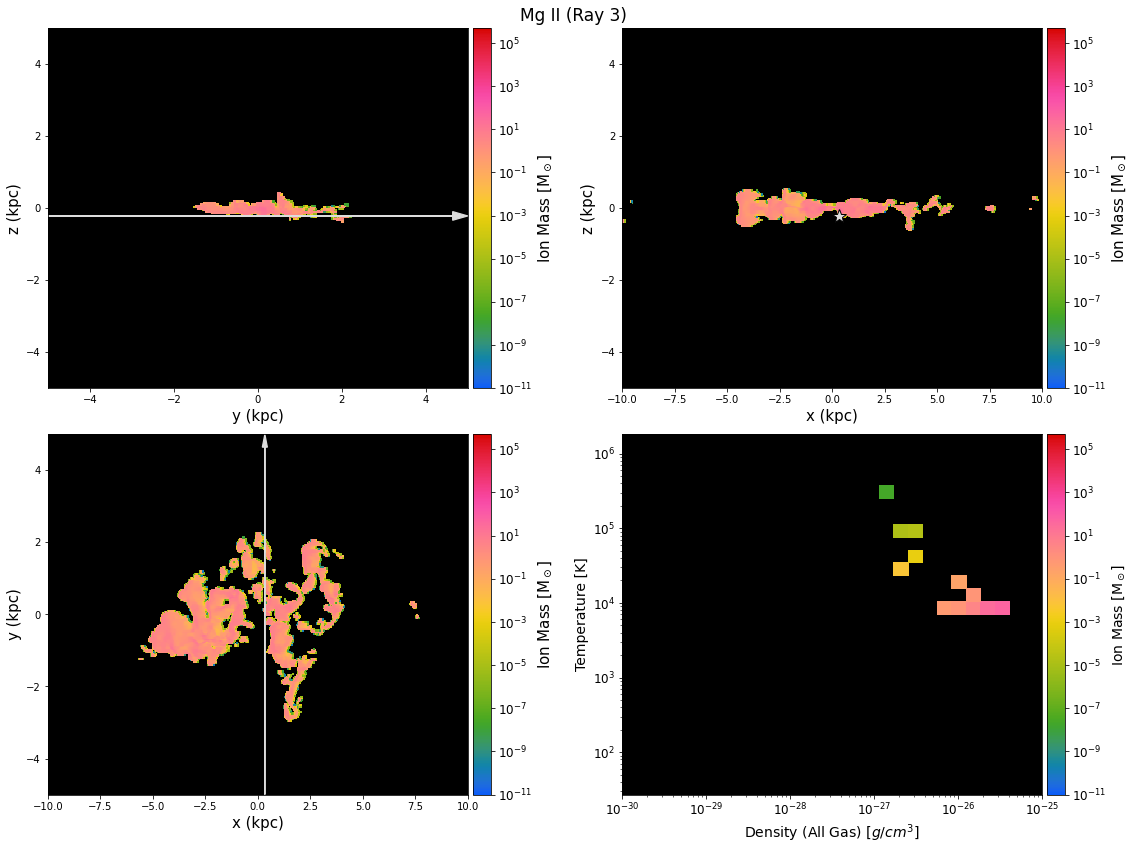

In [53]:
plot(xx=den3,yy=temp3,zz=MgII_ray3,x=264,y=128,z=122,
     rx=0.333,ry=-5,rz=-0.22,dx_=0,dy_=10,dz_=0, title='Mg II (Ray 3)', ion_mass=MgII_mass,
    vmin_=10**-11, vmax_=5*10**5)

# Not too abundant ions

In [59]:
CIV_mass = np.array(ds.all_data()[('gas', 'C_p3_mass')])/M
CIV_ray1 = np.array(ray1.all_data()['C_p3_mass'])/M

print(np.min(CIV_mass1), np.max(CIV_mass1))
print(np.min(CIV_ray1), np.max(CIV_ray1))

1.0604047694148675e-08 0.64907276478537
1.196568969879127e-07 0.005100918527524627


<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


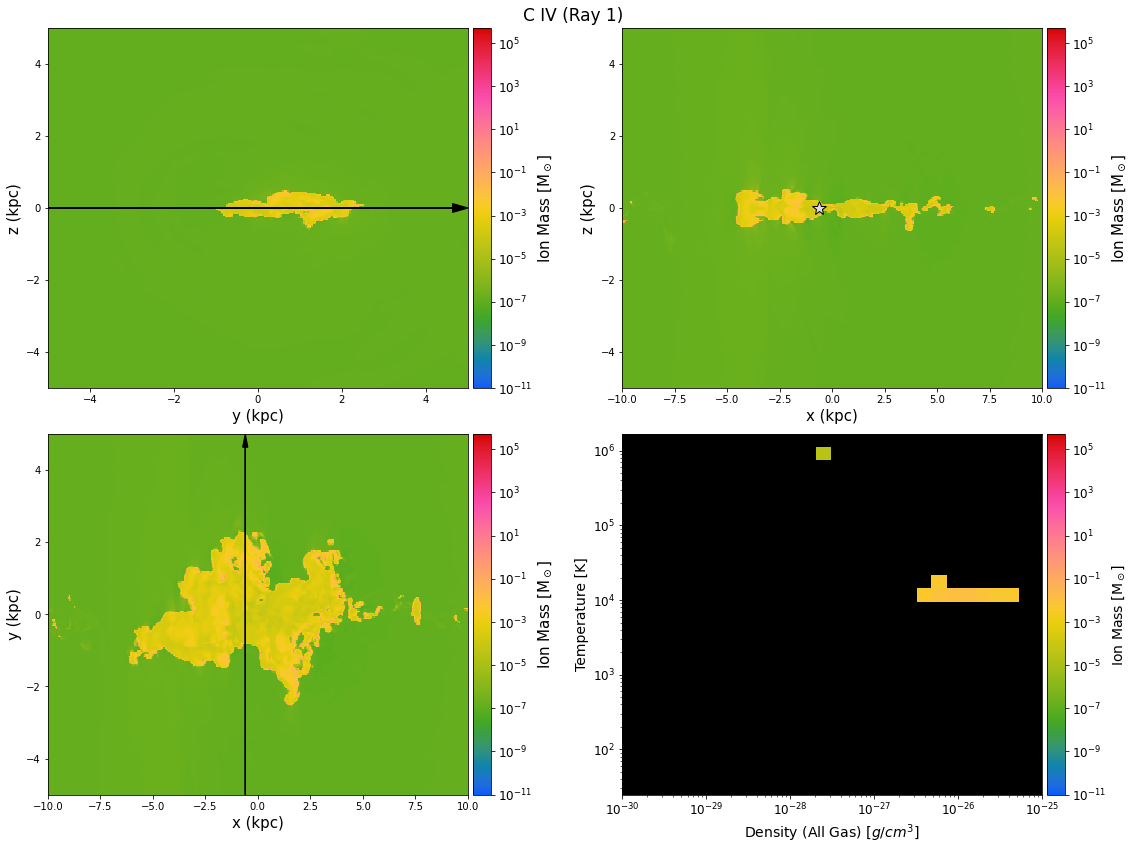

In [60]:
plot(xx=den,yy=temp,zz=CIV_ray1,x=240,y=128,z=128,
     rx=-0.6,ry=-5,rz=0,dx_=0,dy_=10,dz_=0, title='C IV (Ray 1)', ion_mass=CIV_mass,
    vmin_=10**-11, vmax_=5*10**5, color_='black')

In [61]:
CIV_ray2 = np.array(ray2.all_data()['C_p3_mass'])/M
CIV_ray3 = np.array(ray3.all_data()['C_p3_mass'])/M

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


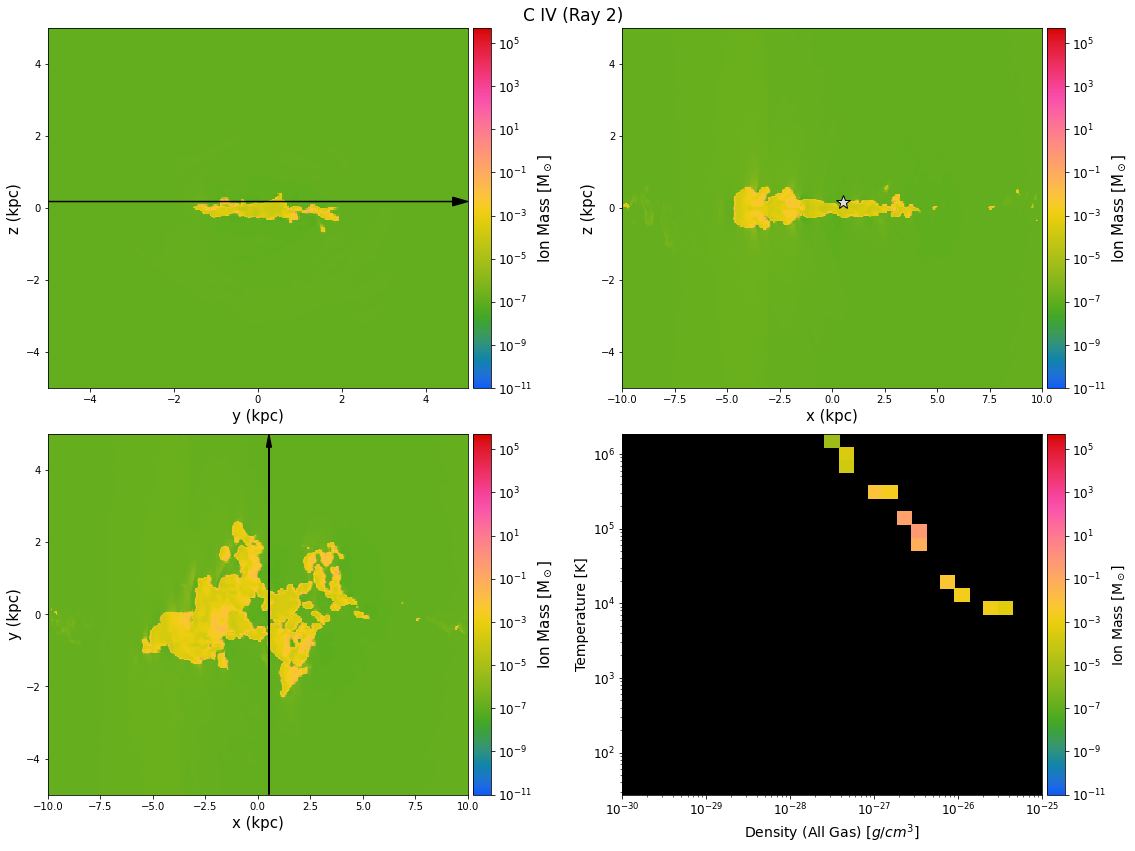

In [62]:
plot(xx=den2,yy=temp2,zz=CIV_ray2,x=269,y=123,z=132,
     rx=0.528,ry=-5,rz=0.18,dx_=0,dy_=10,dz_=0, title='C IV (Ray 2)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=CIV_mass, color_='black')

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


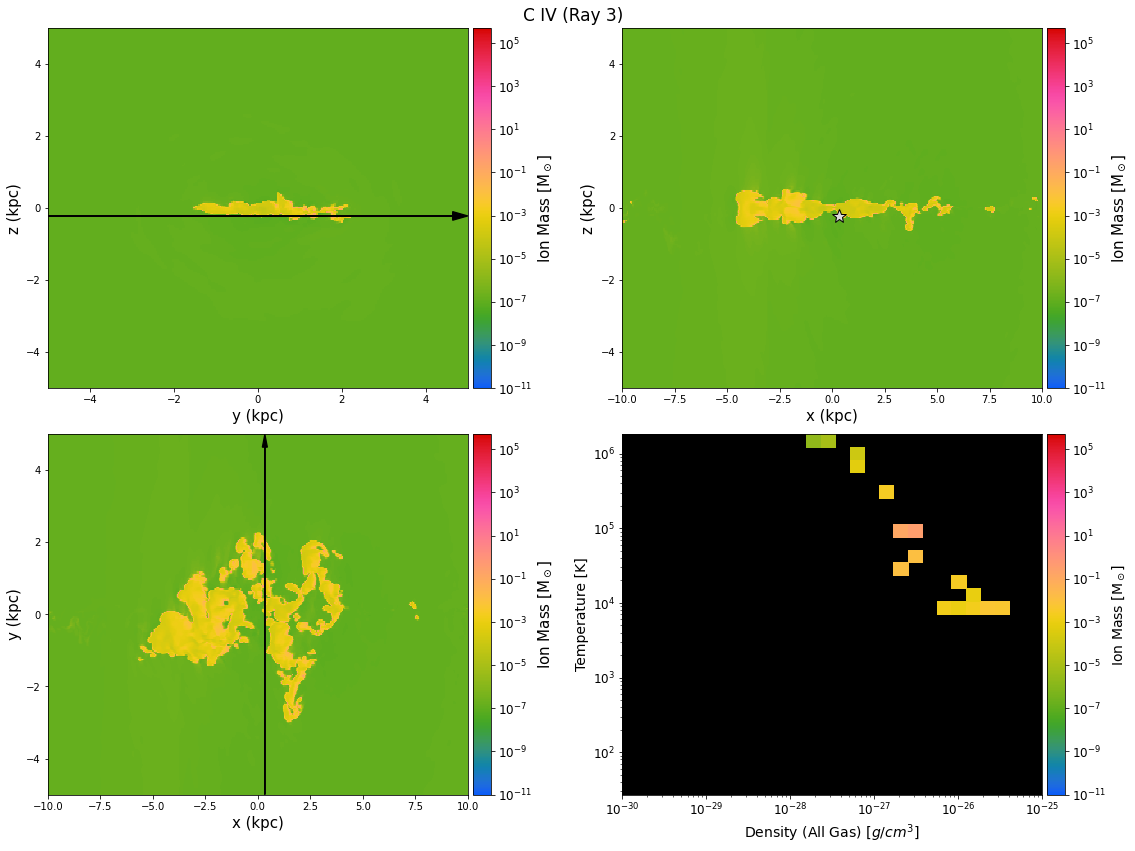

In [63]:
plot(xx=den3,yy=temp3,zz=CIV_ray3,x=264,y=128,z=122,
     rx=0.333,ry=-5,rz=-0.22,dx_=0,dy_=10,dz_=0, title='C IV (Ray 3)', ion_mass=CIV_mass,
    vmin_=10**-11, vmax_=5*10**5, color_='black')

In [64]:
SiIV_mass = np.array(ds.all_data()[('gas', 'Si_p3_mass')])/M
SiIV_ray1 = np.array(ray1.all_data()['Si_p3_mass'])/M
SiIV_ray2 = np.array(ray2.all_data()['Si_p3_mass'])/M
SiIV_ray3 = np.array(ray3.all_data()['Si_p3_mass'])/M

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


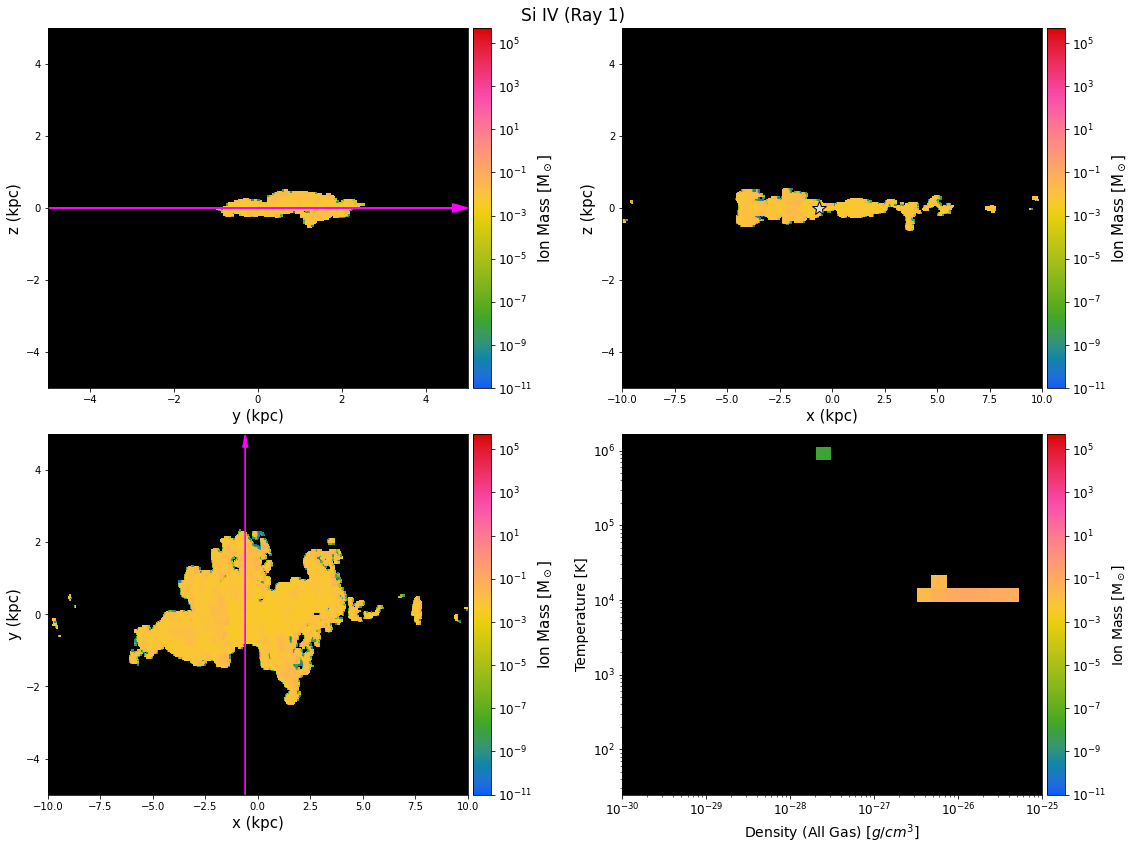

In [68]:
plot(xx=den,yy=temp,zz=SiIV_ray1,x=240,y=128,z=128,
     rx=-0.6,ry=-5,rz=0,dx_=0,dy_=10,dz_=0, title='Si IV (Ray 1)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=SiIV_mass, color_='fuchsia')

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


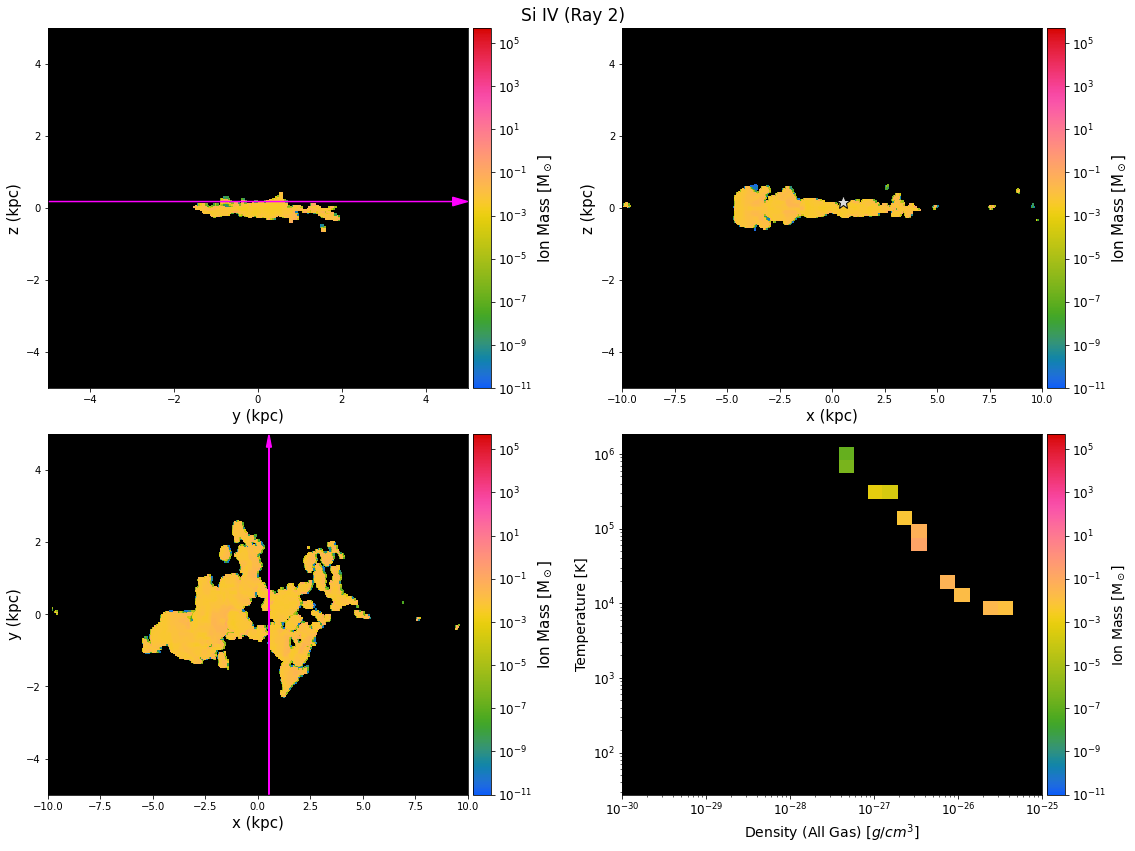

In [71]:
plot(xx=den2,yy=temp2,zz=SiIV_ray2,x=269,y=123,z=132,
     rx=0.528,ry=-5,rz=0.18,dx_=0,dy_=10,dz_=0, title='Si IV (Ray 2)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=SiIV_mass, color_='fuchsia')

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


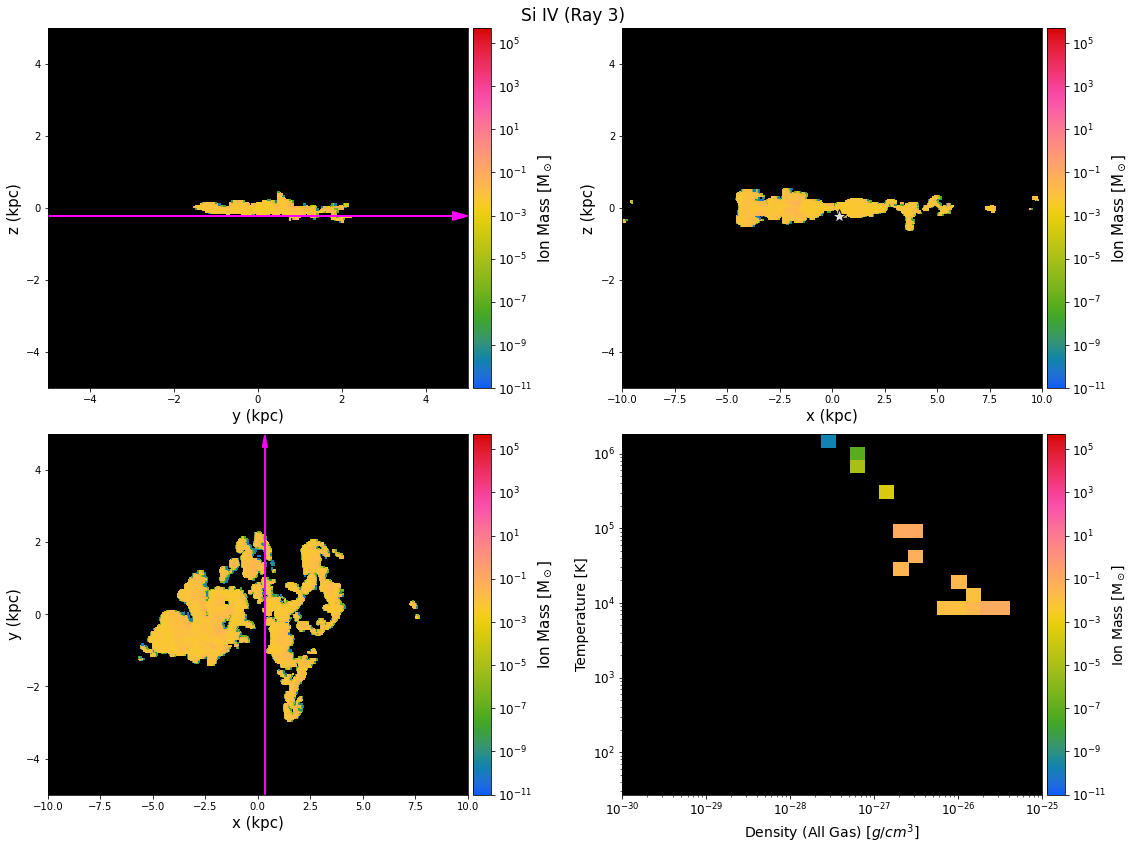

In [72]:
plot(xx=den3,yy=temp3,zz=SiIV_ray3,x=264,y=128,z=122,
     rx=0.333,ry=-5,rz=-0.22,dx_=0,dy_=10,dz_=0, title='Si IV (Ray 3)', ion_mass=SiIV_mass,
    vmin_=10**-11, vmax_=5*10**5, color_='fuchsia')

In [73]:
AlIII_mass = np.array(ds.all_data()[('gas', 'Al_p2_mass')])/M
AlIII_ray1 = np.array(ray1.all_data()['Al_p2_mass'])/M
AlIII_ray2 = np.array(ray2.all_data()['Al_p2_mass'])/M
AlIII_ray3 = np.array(ray3.all_data()['Al_p2_mass'])/M

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


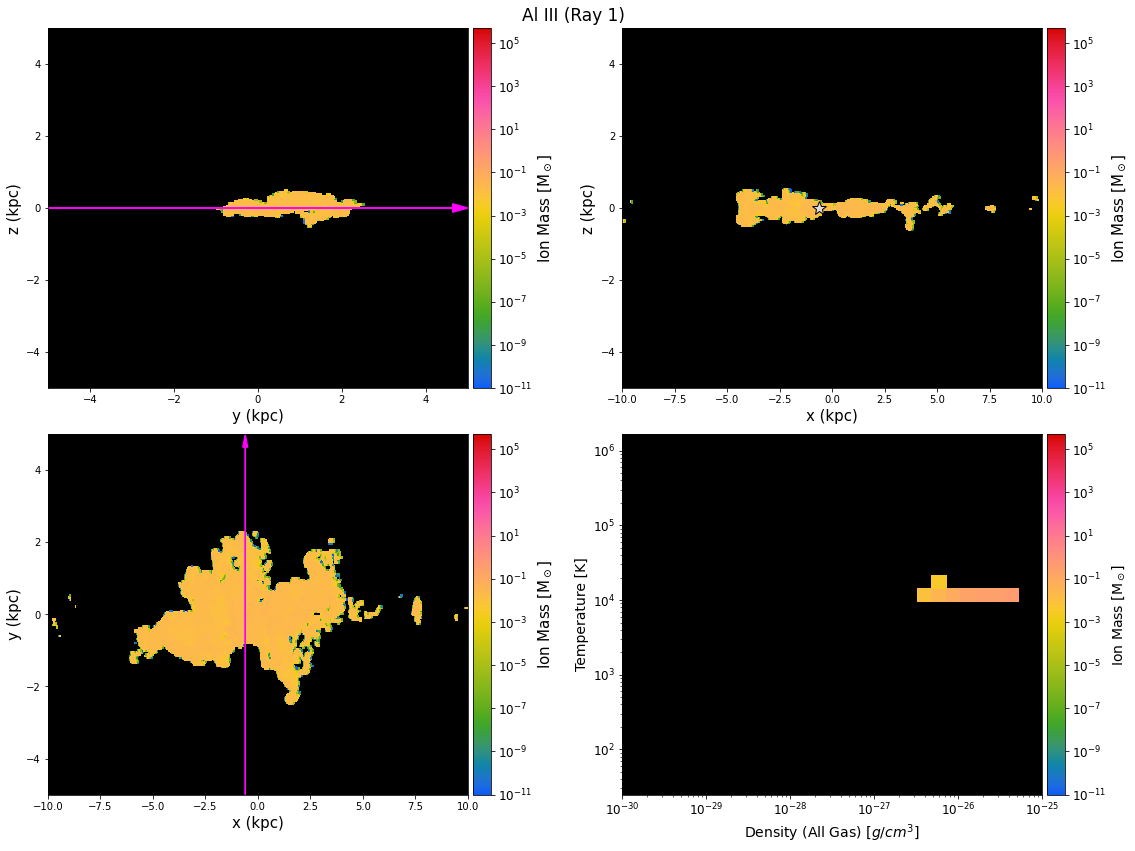

In [75]:
plot(xx=den,yy=temp,zz=AlIII_ray1,x=240,y=128,z=128,
     rx=-0.6,ry=-5,rz=0,dx_=0,dy_=10,dz_=0, title='Al III (Ray 1)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=AlIII_mass, color_='fuchsia')

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


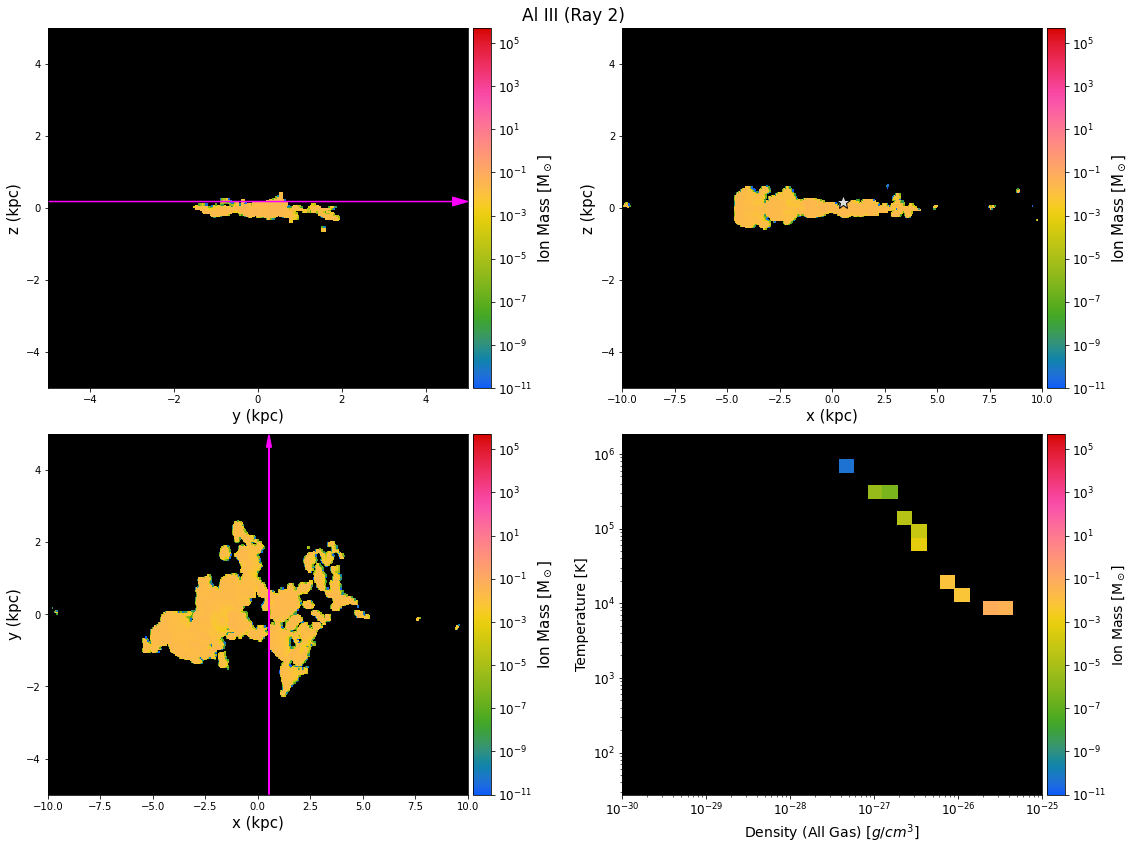

In [76]:
plot(xx=den2,yy=temp2,zz=AlIII_ray2,x=269,y=123,z=132,
     rx=0.528,ry=-5,rz=0.18,dx_=0,dy_=10,dz_=0, title='Al III (Ray 2)', 
     vmin_=10**-11, vmax_=5*10**5,y_arr=False, ion_mass=AlIII_mass, color_='fuchsia')

<ipython-input-3-93c2d3909d3d>:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color=color_,head_width=0.24, lw=1.25,
<ipython-input-3-93c2d3909d3d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist4.transpose(), norm=colors.LogNorm(), cmap="cet_CET_R3")


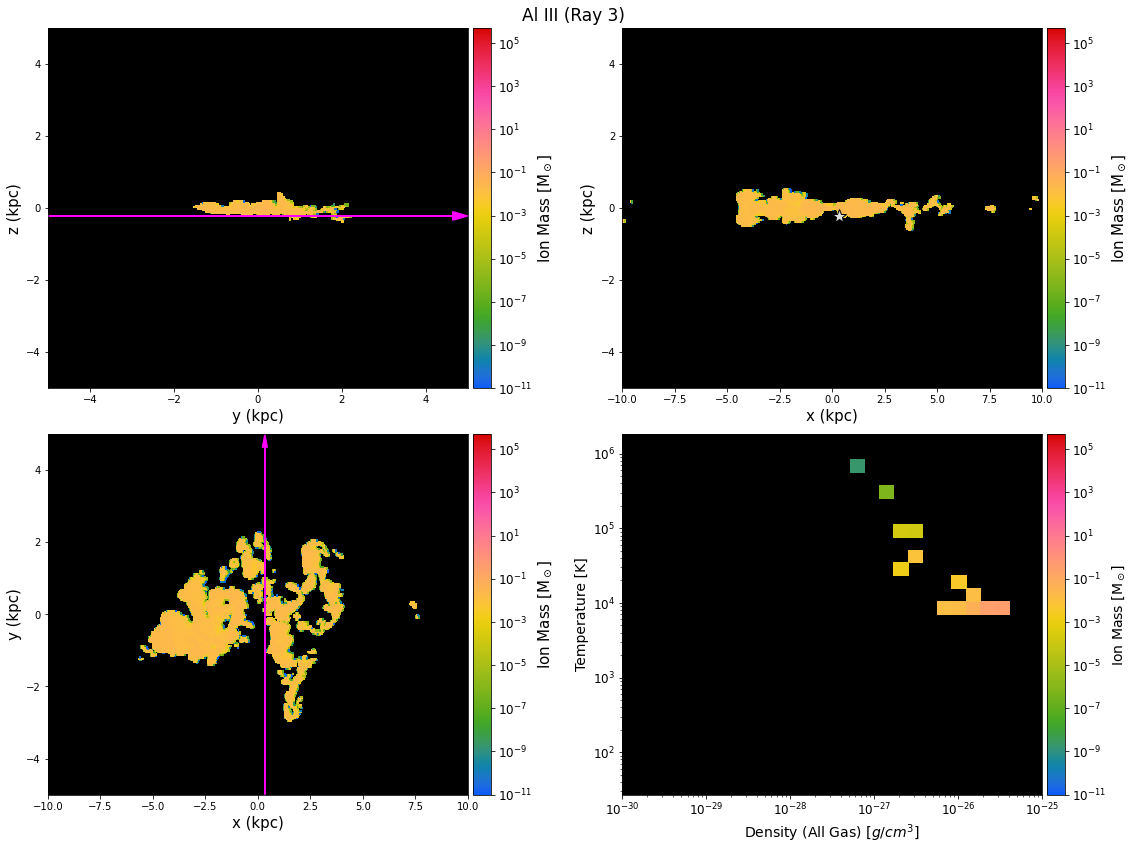

In [77]:
plot(xx=den3,yy=temp3,zz=AlIII_ray3,x=264,y=128,z=122,
     rx=0.333,ry=-5,rz=-0.22,dx_=0,dy_=10,dz_=0, title='Al III (Ray 3)', ion_mass=AlIII_mass,
    vmin_=10**-11, vmax_=5*10**5, color_='fuchsia')